 # Разработка модели для предсказания риска сердечного приступа

## Техническое задание к проекту М1

1. Общая информация и цель проекта
В этом проекте предполагается работа с датасетом из открытого источника. Вам потребуется разработать модель машинного обучения, а также подготовить библиотеку и интерфейс к ней для предсказания на тестовой выборке. В начале проекта вам будет доступен обучающий датасет и тестовый датасет, не содержащий правильных ответов. Метрика на тестовом датасете будет измерена в ходе проверки работы. Также вам будет доступен скрипт, с помощью которого будет измеряться финальная метрика вашей модели.
2. Задачи проекта
Предполагается, что в ходе работы над проектом будут решены следующие задачи:
- 	Исследование датасета (предполагается поиск дополнительной информации для лучшего понимания природы данных)
- 	Предобработка данных. Будьте внимательны: в данных могут быть бесполезные признаки, сильно скорелированные признаки а также косвенные утечки целевого признака. Некоторые колонки потребуется преобразовать к нужному типу данных.
- 	Обучение модели
- 	Подготовка предсказания на тестовой выборке. Обратите внимание. Файл предсказаний должен быть в csv формате и содержать 2 столбца: “id” и “prediction”.
- 	Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке
- 	Написание инструмента для тестирования
- 	Оформление документации
3. Описание исходных данных
Данные пациентов для предсказания риска сердечных приступов
-	id  - id
-	Антропометрические параметры (вес, возраст, рост)
-	Привычки (курение, качество сна и т.д)
-	Давление
-	Наличие хронических заболеваний
-	Биохимия крови
-	Таргет - высокий или низкий риск поражения сердца

Train

https://drive.google.com/file/d/1QYkOGKlHtugjJcccN7UhwPAvfsfyck7C/view?usp=sharing

Test

https://drive.google.com/file/d/1qJduj_-_nWCNhfTdICReepAbUs8OHC_Y/view?usp=sharing

Скрипт, которым будет тестироваться качество вашей модели

https://drive.google.com/file/d/12sMCamQieVwGXa-VIKjbjXdJqeUYSd-D/view?usp=share_link


4. Используемая метрика оценки качества и сравнения моделей
В ходе анализа датасетов вам предстоит самостоятельно определить наилучшую метрику оценки качества модели и обосновать ваш выбор.
5. Стек
- Python (ООП)
- Pandas
- numpy
- Scikitlearn
- CatBoost
- FastAPI
- HTML
6. Таймлайн проекта
Проект длится 2 недели и включает в себя:
- Установочную встречу
- Семинар по FastAPI + QA-сессия
- Финальная встреча


7. Результат
В результате у вас должно получиться приложение на FastAPI (или аналогичном фреймворке) которое принимает на вход путь к csv файлу тестовой выборки, выполняет предсказание (например, путем POST запроса к сервису) и возвращает ответ в формате JSON. Допускается для тестирования написать скрипт, который посылает запрос к запущенному ранее приложению, либо реализовать веб-интерфейс.

Обратите внимание, что оцениваться будет помимо качества модели структурированность, понятность и чистота кода, архитектура приложения. Обязательным является использование ООП, то есть составные части приложения должны быть реализованы в виде классов. Проект должен быть оформлен в виде репозитория на github (gitlab), должна быть написана документация к сервису с описанием для пользователя и описанием классов и методов в приложении, как если бы далее ваш проект вы передавали пользователю. В jupiter ноутбуках могут быть только исследования и эксперименты, если демонстрацию результатов работы приложения вы также выносите в ноутбук - то кода приложения в ноутбуке быть не должно: он должен импортироваться в качестве внешних модулей.

### Формат сдачи работы

В репозитории должны быть:
-	Jupiter Notebook с исследованием, обучением моделей и выводами
-	Код вашего приложения
-	Предсказание на тестовой выборке в требуемом формате
-	Инструкция по запуску вашего приложения ИЛИ Jupiter Notebook с демонстрацией работы приложения ИЛИ выступление на финальной встрече где вы продемонстрируете работу приложения вживую

Критерии оценки
-	Исследование и результаты обучения моделей
-	Метрика на тестовой выборке (измеряется при проверке)
-	Чистота кода и структурированность кода
-	Оформление репозитория
-	Воспроизводимость результатов



import pandas as pd
from sklearn.metrics import classification_report
import argparse

def main(args):
    corr_df = pd.read_csv(args.correct, index_col=0)
    stud_df = pd.read_csv(args.student, index_col=0)
    assert list(stud_df.columns) == ["id", "prediction"]
    assert len(stud_df) == len(corr_df)
    print(classification_report(corr_df["prediction"], stud_df["prediction"]))

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="test script")
    parser.add_argument("--student", type=str, required=True, help="path to students answer")
    parser.add_argument("--correct", type=str, default="correct_answers.csv", help="path to correct answers")
    arguments = parser.parse_args()
    main(arguments)


##  <font color='blue'><b>Шаг 1. Загрузка данных     </b></font><br>

In [1]:
# dbogoslovtsev
%%capture
%pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
from scipy import stats as st


from sklearn.model_selection import (
    cross_val_score,
    train_test_split
)

from sklearn.metrics import (
    f1_score,
    roc_curve
)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance

#Тепловая карта коэффициентов корреляции
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures
)

# импортируем классы для перебора параметров
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV
)

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (
    roc_auc_score,
    make_scorer,
    confusion_matrix
)

# загружаем нужные модели
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.svm import SVC


from sklearn.metrics import mean_squared_error

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    recall_score,
    precision_score
)

import shap

from sklearn.ensemble import RandomForestRegressor


pd.set_option('display.max_colwidth', None)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

Загрузим файлы с данными:

In [3]:
# dbogoslovtsev

train_file_id = "1QYkOGKlHtugjJcccN7UhwPAvfsfyck7C"
test_file_id = "1qJduj_-_nWCNhfTdICReepAbUs8OHC_Y"

heart_train = pd.read_csv(f"https://drive.google.com/uc?id={train_file_id}")
heart_test = pd.read_csv(f"https://drive.google.com/uc?id={test_file_id}")

# heart_train = pd.read_csv(r"C:\Users\melni\Desktop\MASTERSKAYA\heart_train.csv")
# heart_test = pd.read_csv(r"C:\Users\melni\Desktop\MASTERSKAYA\heart_test.csv")

In [4]:
heart_train.head()

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0  0.359551     0.732143    0.074244       1.0             1.0   
1           1  0.202247     0.325000    0.047663       1.0             1.0   
2           2  0.606742     0.860714    0.055912       1.0             0.0   
3           3  0.730337     0.007143    0.053162       0.0             0.0   
4           4  0.775281     0.757143    0.021998       0.0             0.0   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0      1.0      1.0                  1.0                 0.535505  ...   
1      0.0      0.0                  1.0                 0.068690  ...   
2      1.0      1.0                  1.0                 0.944001  ...   
3      1.0      0.0                  1.0                 0.697023  ...   
4      1.0      0.0                  1.0                 0.412878  ...   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                              3.0             0.333333   
1                              3.0             0.833333   
2                              2.0             1.000000   
3                              0.0             0.333333   
4                              5.0             1.000000   

   Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  \
0                         0.0     0.227018  0.048229  0.036512    Male   
1                         0.0     0.150198  0.017616  0.000194  Female   
2                         0.0     0.227018  0.048229  0.036512  Female   
3                         1.0     0.227018  0.048229  0.036512  Female   
4                         1.0     0.227018  0.048229  0.036512    Male   

   Systolic blood pressure  Diastolic blood pressure    id  
0                 0.212903                  0.709302  2664  
1                 0.412903                  0.569767  9287  
2                 0.238710                  0.220930  5379  
3                 0.348387                  0.267442  8222  
4                 0.619355                  0.441860  4047  

[5 rows x 28 columns]

In [5]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [6]:
heart_test.head()

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0  0.494382     0.264286    0.062328       0.0             1.0   
1           1  0.224719     0.953571    0.082493       1.0             0.0   
2           2  0.629213     0.092857    0.064161       0.0             1.0   
3           3  0.460674     0.567857    0.055912       1.0             1.0   
4           4  0.719101     0.485714    0.022915       1.0             0.0   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0      1.0      1.0                  1.0                 0.361618  ...   
1      0.0      1.0                  0.0                 0.996483  ...   
2      1.0      1.0                  0.0                 0.995561  ...   
3      1.0      1.0                  1.0                 0.437277  ...   
4      1.0      0.0                  1.0                 0.514920  ...   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0       0.306494                              1.0             0.333333   
1       0.087013                              0.0             0.166667   
2       0.205195                              7.0             1.000000   
3       0.163636                              0.0             0.666667   
4       0.580519                              5.0             0.000000   

   Blood sugar     CK-MB  Troponin  Gender  Systolic blood pressure  \
0     0.227018  0.048229  0.036512    Male                 0.283871   
1     0.227018  0.048229  0.036512  Female                 0.703226   
2     0.102767  0.002666  0.088455    Male                 0.458065   
3     0.203557  0.056390  0.271774  Female                 0.741935   
4     0.227018  0.048229  0.036512    Male                 0.412903   

   Diastolic blood pressure    id  
0                  0.372093  7746  
1                  0.441860  4202  
2                  0.779070  6632  
3                  0.255814  4639  
4                  0.395349  4825  

[5 rows x 27 columns]

In [7]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

- 0   Unnamed:                       порядковый номер строки
- 1   Age:                              возраст
- 2   Cholesterol:                      холестерин
- 3   Heart rate:                       частота биения сердца
- 4   Diabetes :                        диабет есть\нет
- 5   Family History :                  Наследственные заболевания
- 6   Smoking :                         Курение
- 7   Obesity  :                        Ожирение
- 8   Alcohol Consumption :             Употребление алкоголя
- 9   Exercise Hours Per Week :         Количество Часов упражнений в Неделю
- 10  Diet :                            Диета
- 11  Previous Heart Problems  :        Предыдущие проблемы с сердцем
- 12  Medication Use  :                 Использование лекарств
- 13  Stress Level  :                   Уровень стресса
- 14  Sedentary Hours Per Day :         Количество сидячих часов в день
- 15  Income   :                        Уровень дохода
- 16  BMI  :                            Body Mass Index, в медицине — индекс массы тела, показатель, который позволяет оценить соответствие массы человека его росту
- 17  Triglycerides :                   триглицериды
- 18  Physical Activity Days Per Week : Кол-во дней физической активности в Неделю
- 19  Sleep Hours Per Day  :            Кол-во часов сна в сутки
- 20  Blood sugar :                     Содержание сахара в крови
- 21  CK-MB  :                          креатинкиназа-МВ - фермент, который находится в мышцах сердца и является важным маркером для диагностики повреждения сердечной мышцы.
- 22  Troponin  :                       тропонин
- 23  Gender :                          пол
- 24  Systolic blood pressure :         Систолическое кровяное давление
- 25  Diastolic blood pressure :        Диастолическое кровяное давление
- 26  id :                              идентификационный номер пациента  

<font color='blue'><b> Вывод: </b></font><br>


Произведена загрузка библиотек.

Загружено 2 файла:
1. heart_train - тренировочная выборка
2. heart_test - тестовой выборка


## <font color='blue'><b>Шаг 2. Предобработка данных     </b></font><br>

### Поиск явных дубликатов в датафреймах.

In [8]:
def duplicat(x):
    for a in x:
        print(a.duplicated().sum())

In [9]:
duplicat([heart_train, heart_test])

0
0


### Обработка пропусков в датафреймах.

In [10]:
heart_train.isna().sum()

Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure              0
Diastolic blood pressure             0
id                                   0
dtype: int64

In [11]:
heart_test.isna().sum()

Unnamed: 0                          0
Age                                 0
Cholesterol                         0
Heart rate                          0
Diabetes                           31
Family History                     31
Smoking                            31
Obesity                            31
Alcohol Consumption                31
Exercise Hours Per Week             0
Diet                                0
Previous Heart Problems            31
Medication Use                     31
Stress Level                       31
Sedentary Hours Per Day             0
Income                              0
BMI                                 0
Triglycerides                       0
Physical Activity Days Per Week    31
Sleep Hours Per Day                 0
Blood sugar                         0
CK-MB                               0
Troponin                            0
Gender                              0
Systolic blood pressure             0
Diastolic blood pressure            0
id                                  0
dtype: int64

<font color='blue'><b> Вывод: </b></font><br>

Анализируя файлы методом .info(), выявлены пропуски:

**1. датафрейм heart_train:**


- Кол-во пропусков - 2.8 % от общего кол-ва записей


**2. датафрейм heart_test:**


- Кол-во пропусков - 3.2 % от общего кол-ва записей**
  
  Характер признаков показывает на отсутствие части опросных данных.
  Судя по одинаковому кол-ву пропусков в разных признаках, пропуски сосредоточены в отдельных записях (строках).
  
В обоих случаях меньше 5%.Пропуски в heart_train смело удаляем. Пропуски в heart_test оставляем, так как тестовые данные трогать нельзя.


Удаление "битых данных" следовало сделать до разделения на тренировочную и тестовую выборки.




### Поиск неявных дубликатов в датафреймах.

In [12]:
# Функция поиска неявных дубликатов
def implicit_duplicates(spisok):
    for table in spisok:
        columns_table = table.select_dtypes(include=['object']).columns
        for colum_n in columns_table:
            print(colum_n,'-', table[colum_n].unique())
        print('------------------------------------------------')

In [13]:
implicit_duplicates([heart_train, heart_test])

Gender - ['Male' 'Female' '1.0' '0.0']
------------------------------------------------
Gender - ['Male' 'Female' '1.0' '0.0']
------------------------------------------------


In [14]:
len(heart_train.loc[(heart_train['Gender'] == '1.0') | (heart_train['Gender'] == '0.0')])

243

In [15]:
len(heart_test.loc[(heart_test['Gender'] == '1.0') | (heart_test['Gender'] == '0.0')])

31

Аномальные значения признака Gender находятся в тех же строках, что  и пропуски. Данный факт подтверждает целесообразность удаления этих строк.

### Проверка на дубликаты с разными 'id', но с идентичными значениями признаков.

In [16]:
##Проверяем после удаления id на появление дубликатов
heart_train.drop('id', axis = 1).duplicated().sum()

np.int64(0)

In [17]:
##Проверяем после удаления id на появление дубликатов
heart_test.drop('id', axis = 1).duplicated().sum()

np.int64(0)

Дубликаты с разными 'id', но с идентичными значениями признаков не обнаружены

### Удаление пропусков в heart_train

In [18]:
heart_train = heart_train.dropna()

In [19]:
heart_train.shape

(8442, 28)

**Округление значений с плавающей точкой в heart_train и heart_test:**

необходимо для корректного формирования срезов данных по конкретным числовым значениям.

In [20]:
# Выбираем столбцы с числами с плавающей точкой
float_cols = heart_train.select_dtypes(include=['float64']).columns
# Преобразуем эти столбцы - округляем значения
heart_train[float_cols] = heart_train[float_cols].round(6)

In [21]:
# Выбираем столбцы с числами с плавающей точкой
float_cols = heart_test.select_dtypes(include=['float64']).columns
# Преобразуем эти столбцы - округляем значения
heart_test[float_cols] = heart_test[float_cols].round(6)

<font color='blue'><b> Вывод: </b></font><br>

Данные загружены, в тестовой выборке пропуски удалены, дубликатов не обнаружено.

## <font color='blue'><b>Шаг 3. Исследовательский анализ данных</b></font><br>

План действий следующий:

1. Строим матрицы корреляции для датафреймов, на основании которых определяем наиболее важные признаки касательно их влияния на таргет, а также пытаемся простроить иерархию признаков по степени их влияния на таргет, а также их взаимное влияние.
2.Рассматриваем каждый признак по отдельности в порядке их важности:
- для количественных признаков оцениваем их на предмет аномалий, а также определяем характер распределения;
- для категориальных признаков определяем их количественные и процентные соотношения;
- рассматриваем все признаки в разрезе их влияния на таргет.
3. на основании полученной информации делаем выводы о взаимосвязях данных, а также о том, как их подготовить к построению моделей.

In [22]:
import phik
import numpy as np
import pandas as pd
import os

#os.environ["OPENBLAS_NUM_THREADS"] = "1"
#os.environ["MKL_NUM_THREADS"] = "1"
#os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [23]:

from phik.report import plot_correlation_matrix
import phik

def matrix_corr(data_frame, interval_cols):

    # убираем идентификаторы
    df = data_frame.drop(columns=["id", "Unnamed: 0"], errors="ignore")

    # считаем phik
    phik_overview = df.phik_matrix(interval_cols=interval_cols)

    # строим матрицу
    plot_correlation_matrix(
        phik_overview.values,
        x_labels=phik_overview.columns,
        y_labels=phik_overview.index,
        title=r"correlation $\phi_K$",
        fontsize_factor=1.5,
        figsize=(20, 20)
    )
    return phik_overview

In [24]:
intervals = [
    'Age', 'Cholesterol', 'Heart rate','Exercise Hours Per Week', 'Diet',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood sugar',
    'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure'
]

**Тренировочная выборка:**

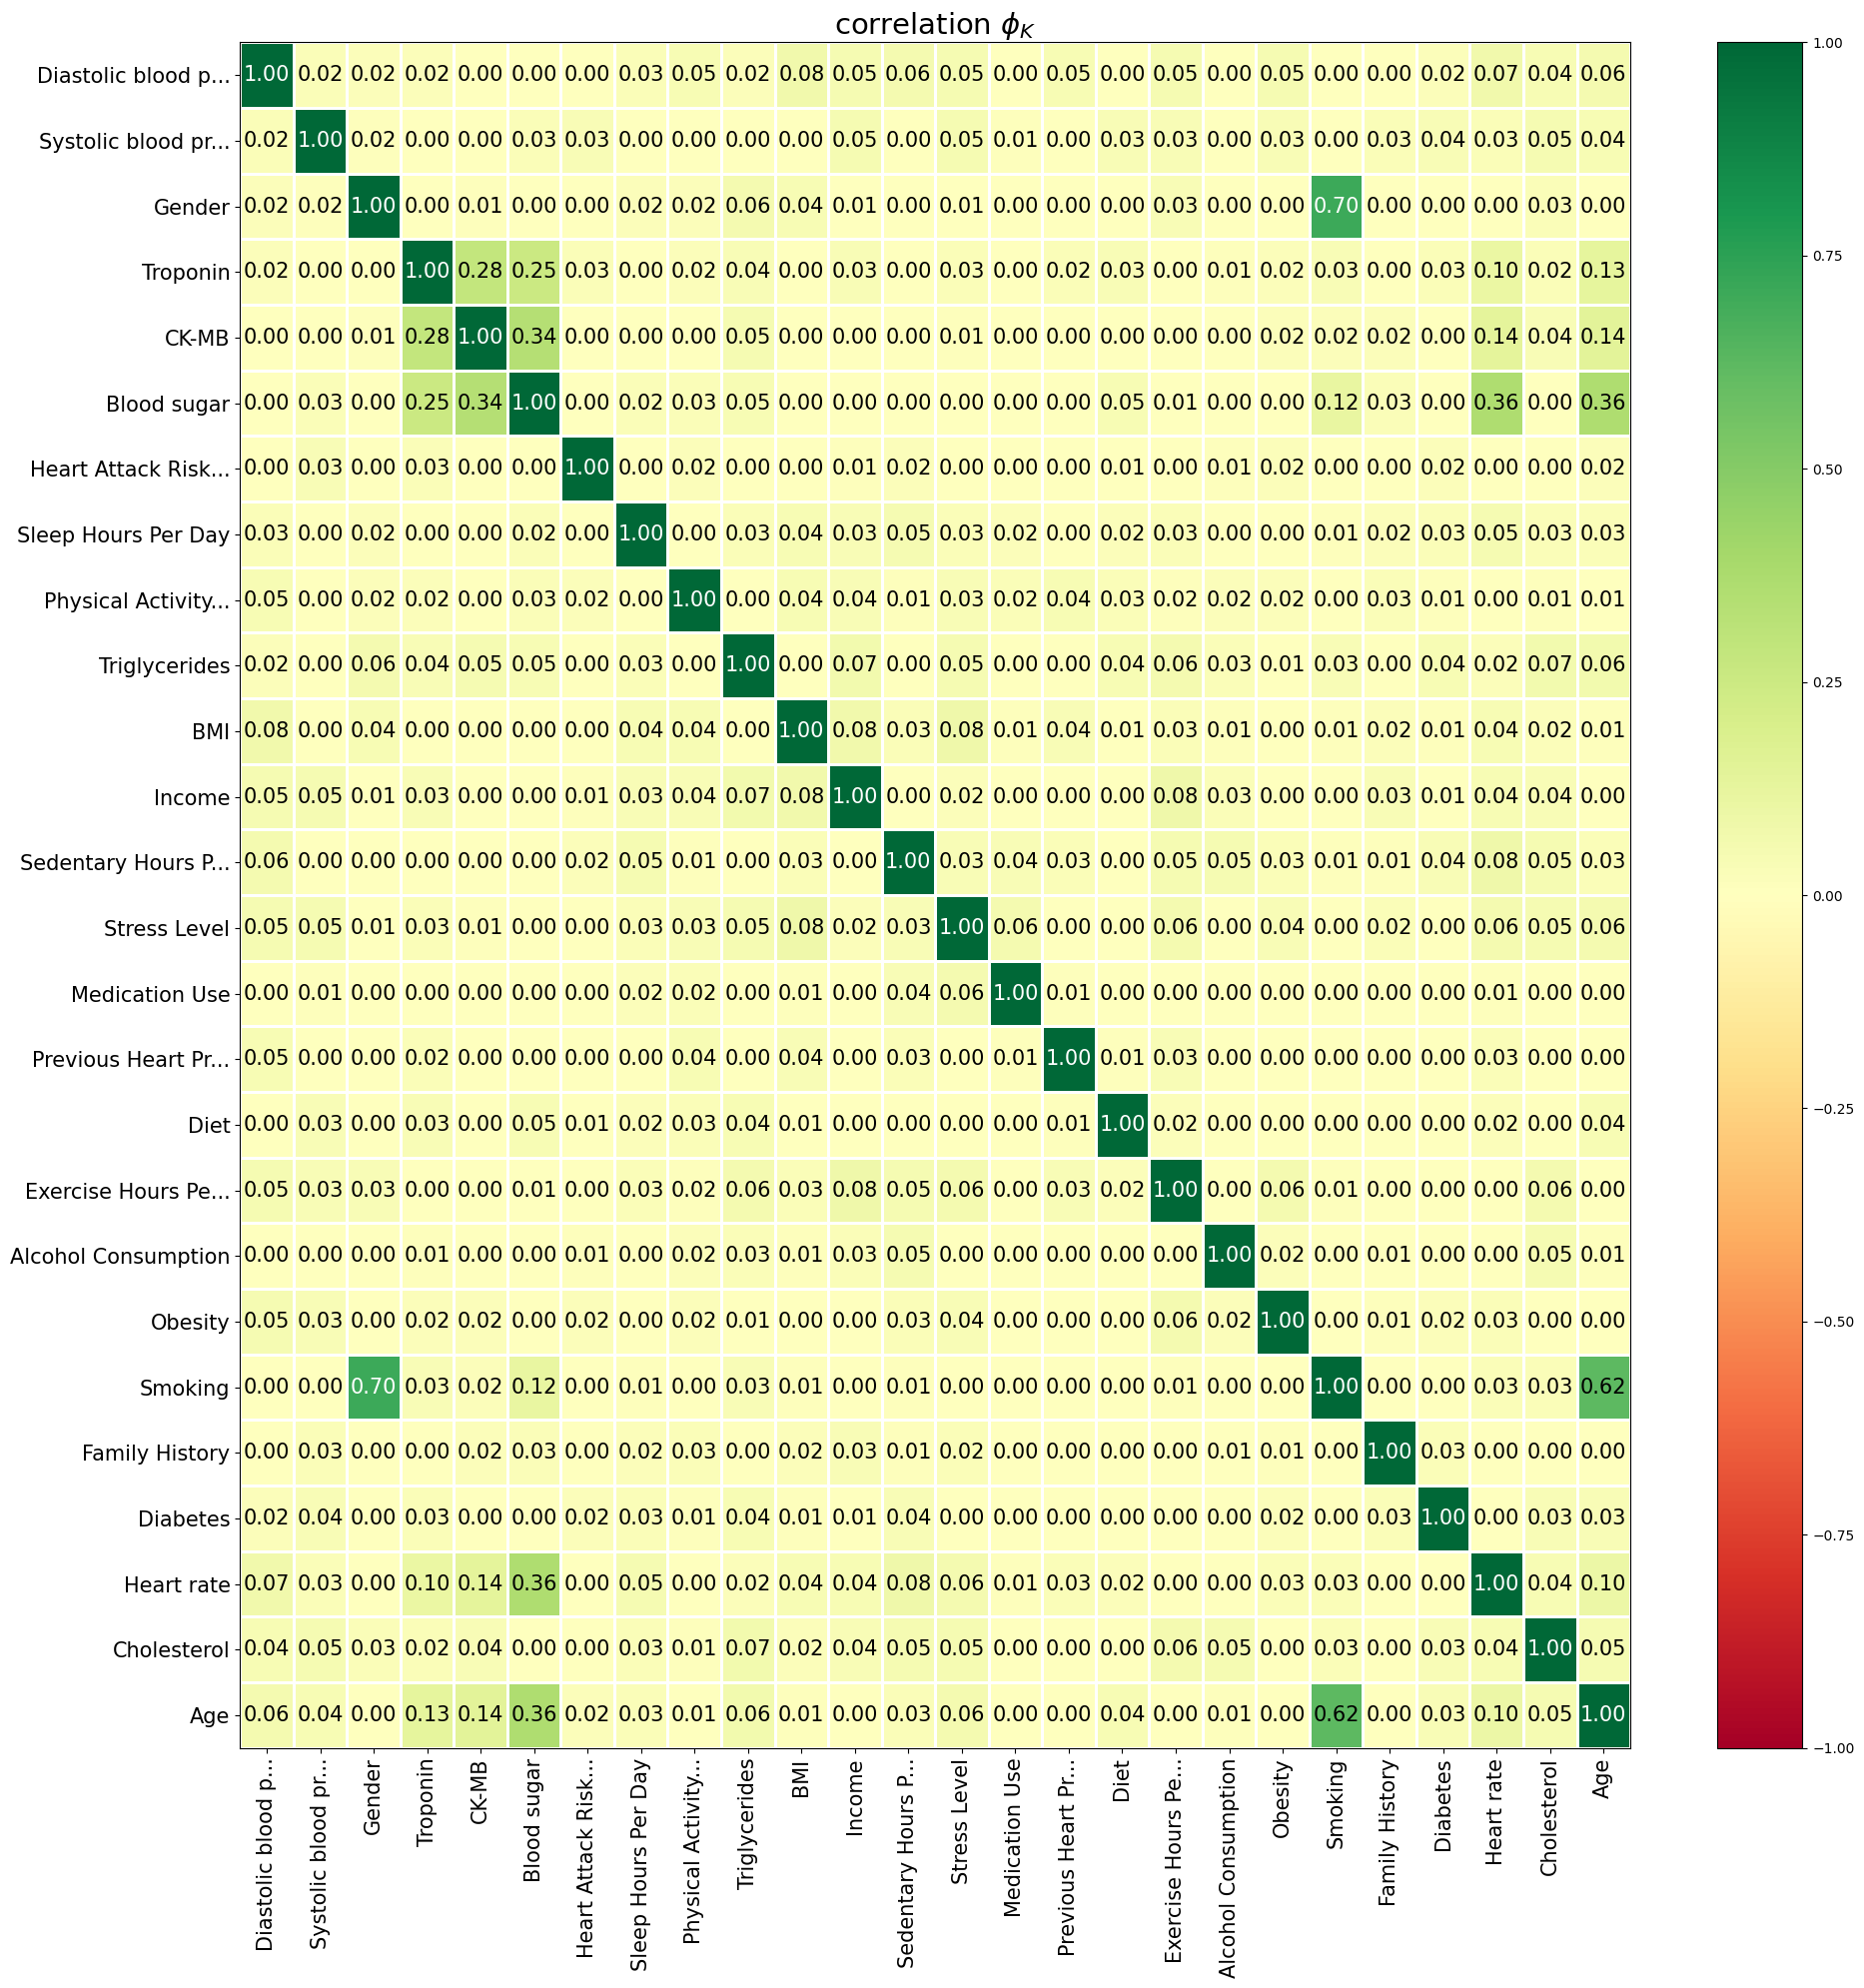

In [25]:
phik_corr = matrix_corr(heart_train, intervals)

**Тестовая выборка:**

In [26]:
phik_corr = matrix_corr(heart_test, intervals)

Тренировочная и тестовая выборки значительно отличаются между собой по взаимным зависимостям признаков.В тестовой выборке зависимости выражены более ярко.

В тренировочной выборке таргет как будто почти не зависит от входных признаков.Взаимные корелляции призаков выражены слабо. Можно выделить группу признаков, связанных по анализу крови:Blood sugar, CK-MB, Troponin. Послеживается сильная связь, между Smoking, Gender, а также между Age, Heart rate.Связи между остальными признаками прослеживаются очень слабо.

### Исследование характера распределений признаков, а также наличие выбросов и аномалий

In [27]:
# Функция отображения графиков:
def hist_boxplot():
    dataset = [heart_train, heart_test]
    dataset_name = ['Тренировочная выборка', 'Тестовая выборка']
    parametr = ['Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week', 'Diet',
                'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
                'Sleep Hours Per Day', 'Blood sugar',
               'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure']

    for j in parametr:
        for i, i1 in zip (dataset, dataset_name):
            #вывод гистограммы
            i[j].hist(bins = 200,\
            grid = True,figsize = (13,5))
            plt.title(f"Параметр {j} датасета {i1}")
            plt.xlabel(j)
            plt.ylabel('Кол-во значений')
            plt.legend(i);
            plt.show();
            #вывод боксплота
            i.boxplot(j,figsize = (12, 1), vert = False).\
            set_title(j)
            plt.tick_params(left = False)
            plt.show();
            # описание параметра
            display(i[j].describe())

count    8442.000000
mean        0.449008
std         0.232809
min         0.044944
25%         0.247191
50%         0.460674
75%         0.640449
max         0.853933
Name: Age, dtype: float64

count    966.000000
mean       0.452916
std        0.231068
min        0.044944
25%        0.247191
50%        0.460674
75%        0.640449
max        0.853933
Name: Age, dtype: float64

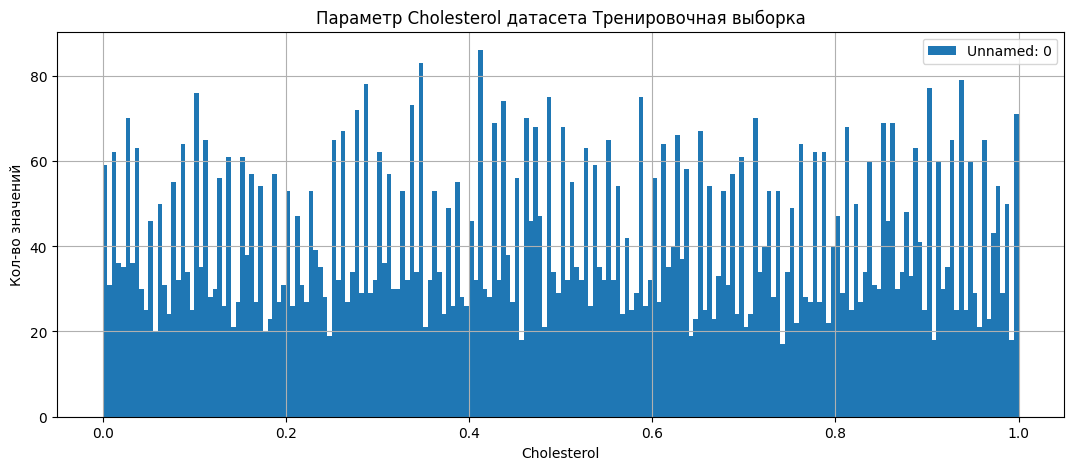

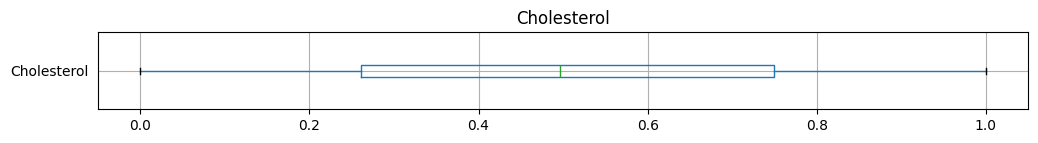

count    8442.000000
mean        0.501108
std         0.288785
min         0.000000
25%         0.260714
50%         0.496429
75%         0.750000
max         1.000000
Name: Cholesterol, dtype: float64

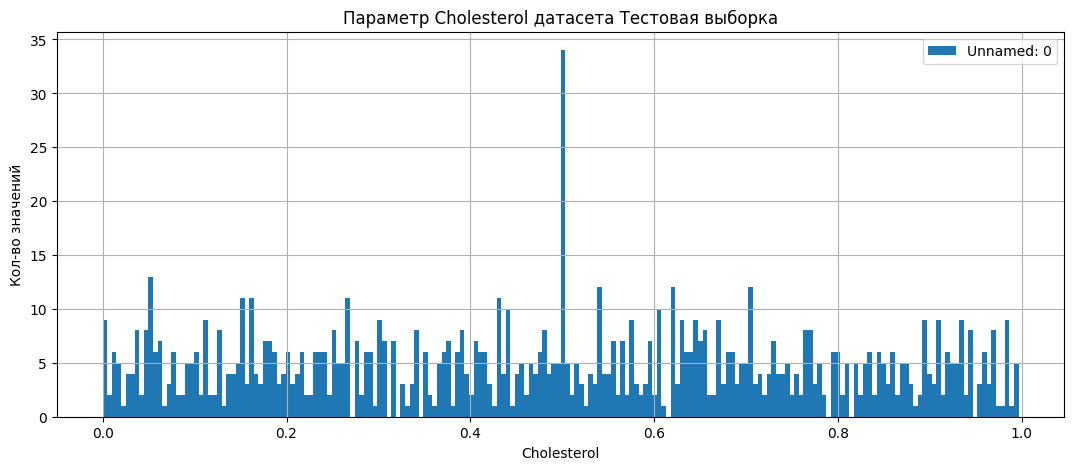

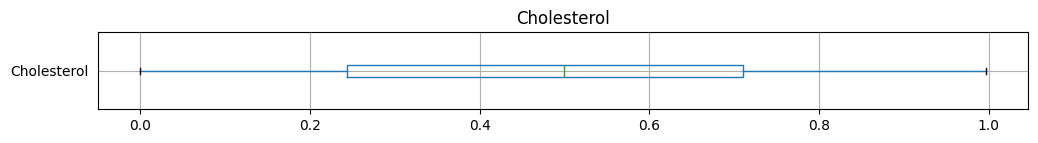

count    966.000000
mean       0.488181
std        0.282039
min        0.000000
25%        0.243750
50%        0.499780
75%        0.710714
max        0.996429
Name: Cholesterol, dtype: float64

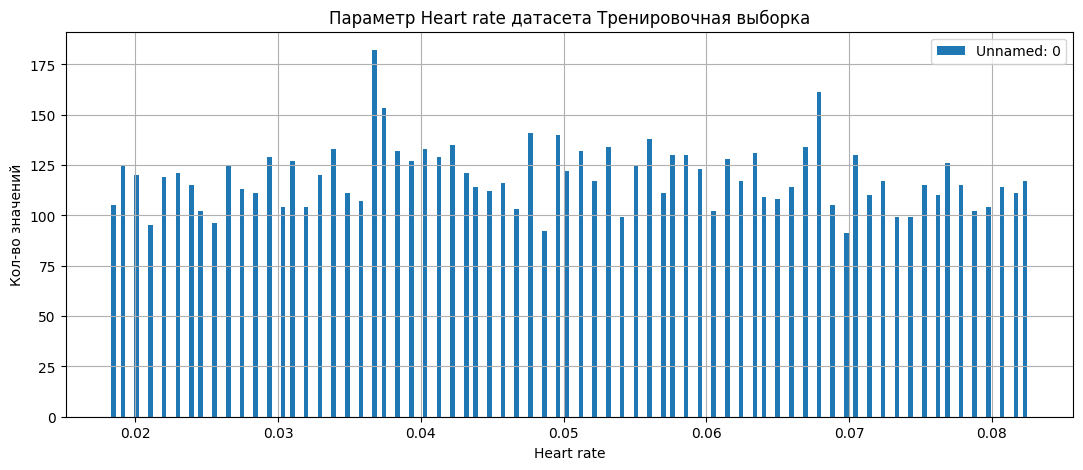

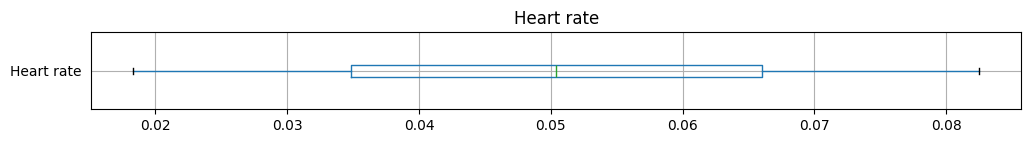

count    8442.000000
mean        0.050194
std         0.018442
min         0.018332
25%         0.034830
50%         0.050412
75%         0.065995
max         0.082493
Name: Heart rate, dtype: float64

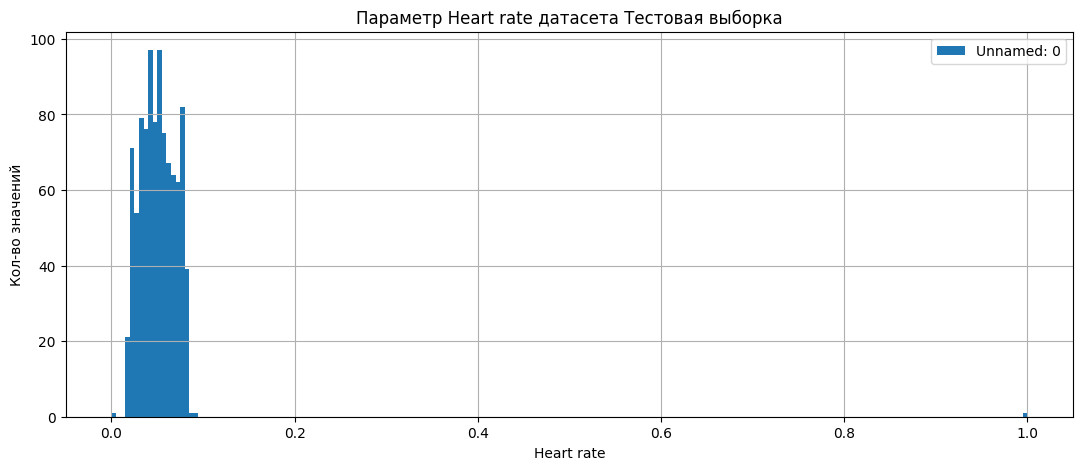

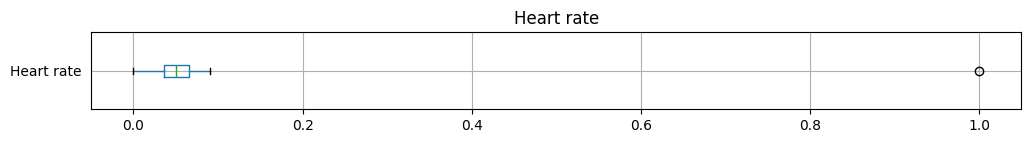

count    966.000000
mean       0.051644
std        0.035502
min        0.000000
25%        0.036664
50%        0.050412
75%        0.065995
max        1.000000
Name: Heart rate, dtype: float64

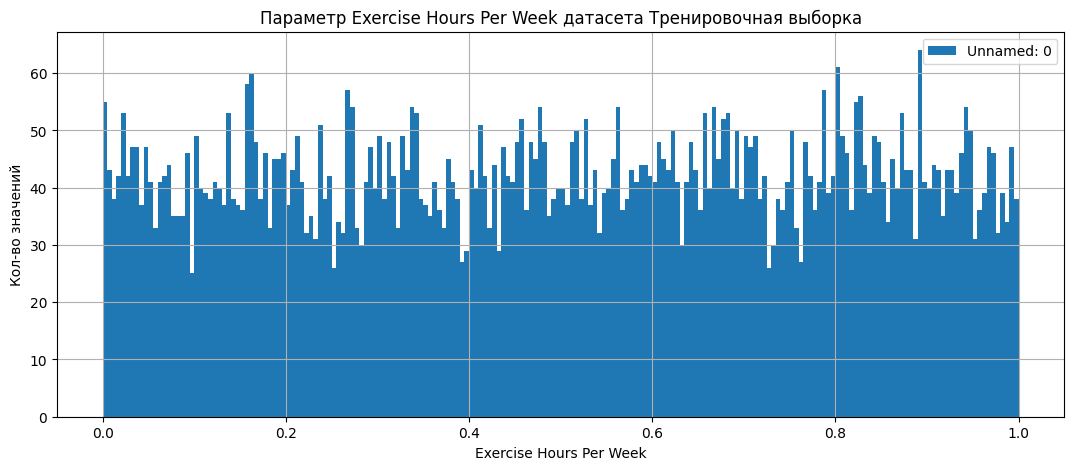

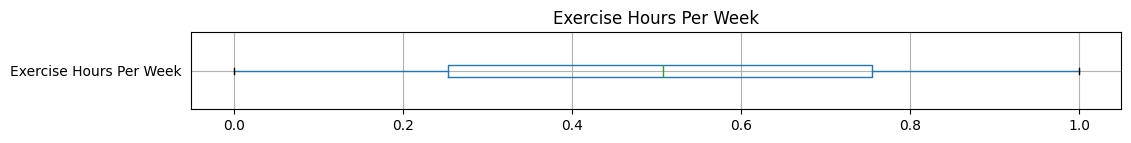

count    8442.000000
mean        0.503415
std         0.288881
min         0.000000
25%         0.253359
50%         0.508244
75%         0.754901
max         1.000000
Name: Exercise Hours Per Week, dtype: float64

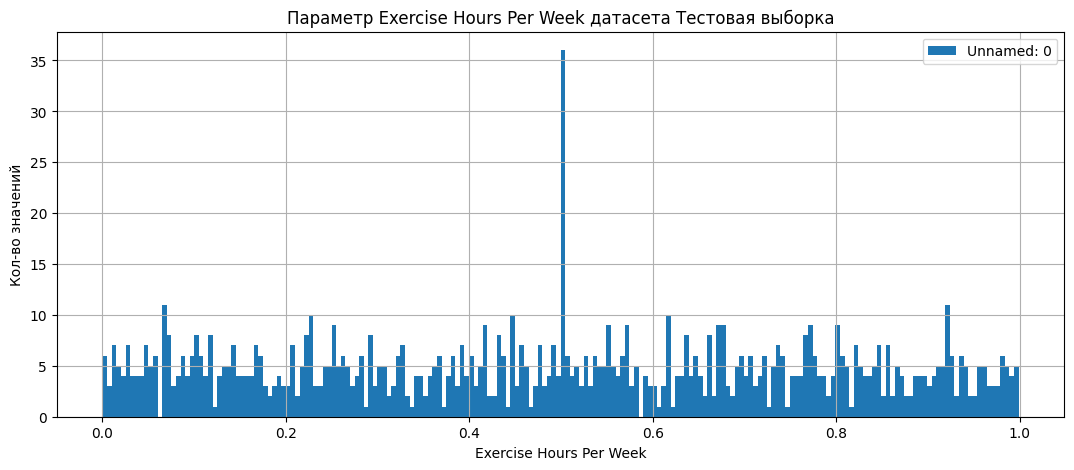

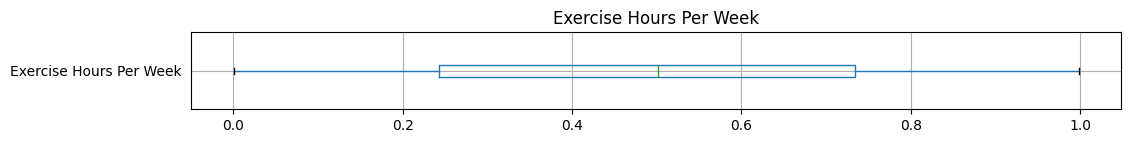

count    966.000000
mean       0.490706
std        0.284902
min        0.000336
25%        0.243430
50%        0.502110
75%        0.734425
max        0.998938
Name: Exercise Hours Per Week, dtype: float64

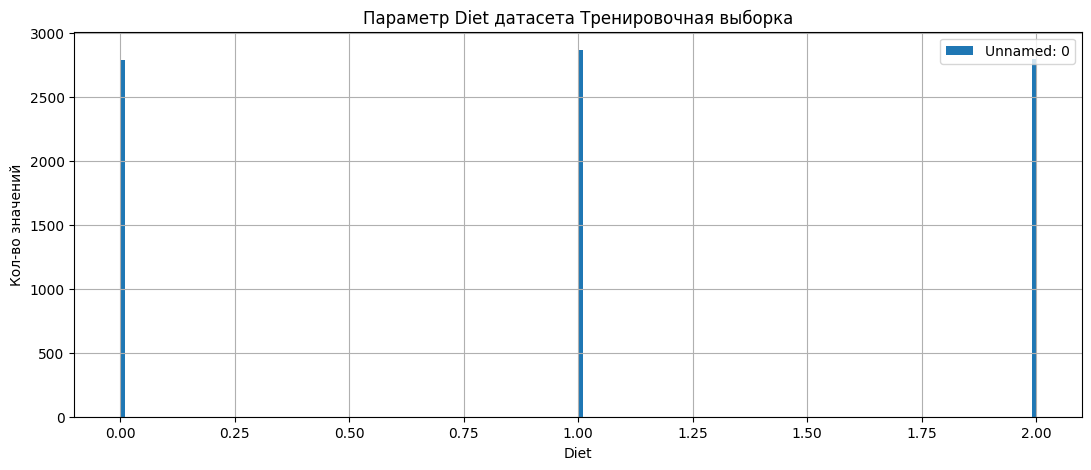

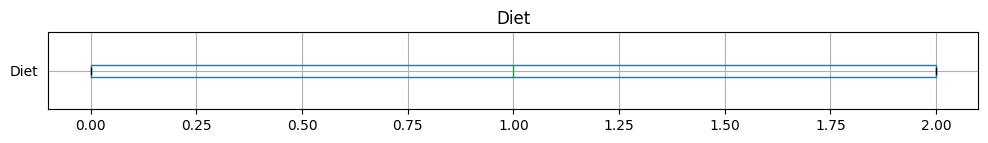

count    8442.000000
mean        1.001540
std         0.812981
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Diet, dtype: float64

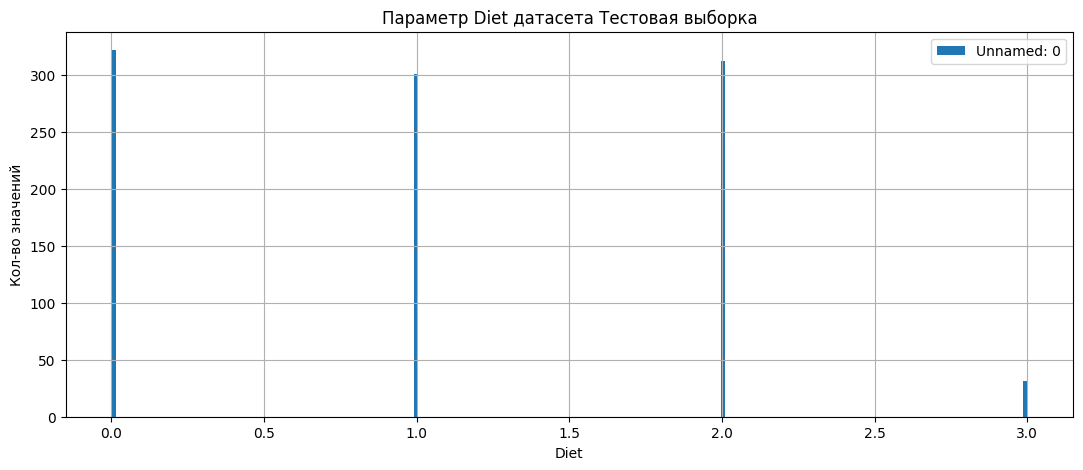

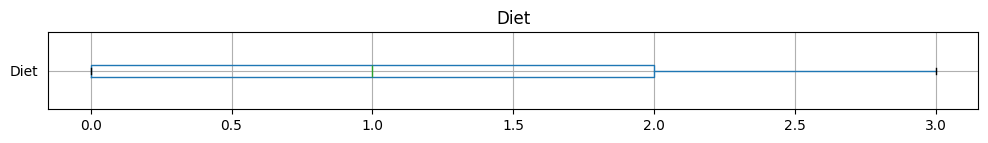

count    966.000000
mean       1.053830
std        0.884642
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Diet, dtype: float64

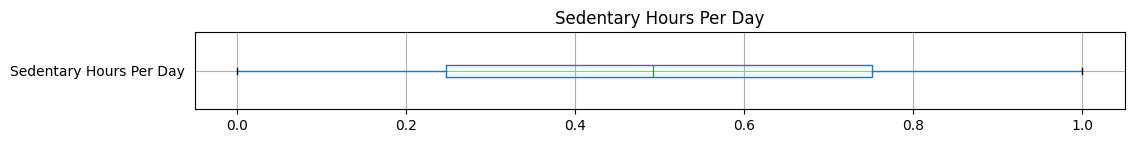

count    8442.000000
mean        0.499142
std         0.289418
min         0.000000
25%         0.247650
50%         0.492734
75%         0.751047
max         1.000000
Name: Sedentary Hours Per Day, dtype: float64

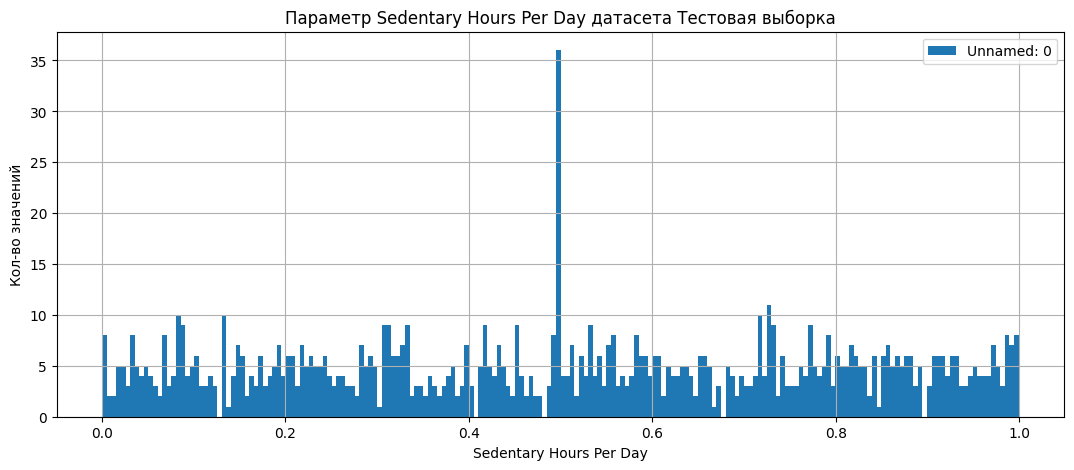

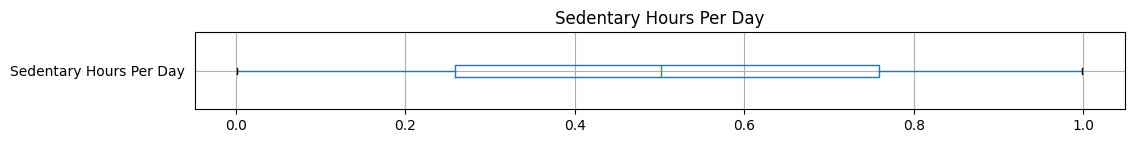

count    966.000000
mean       0.506715
std        0.287826
min        0.001187
25%        0.258713
50%        0.501327
75%        0.759591
max        0.999033
Name: Sedentary Hours Per Day, dtype: float64

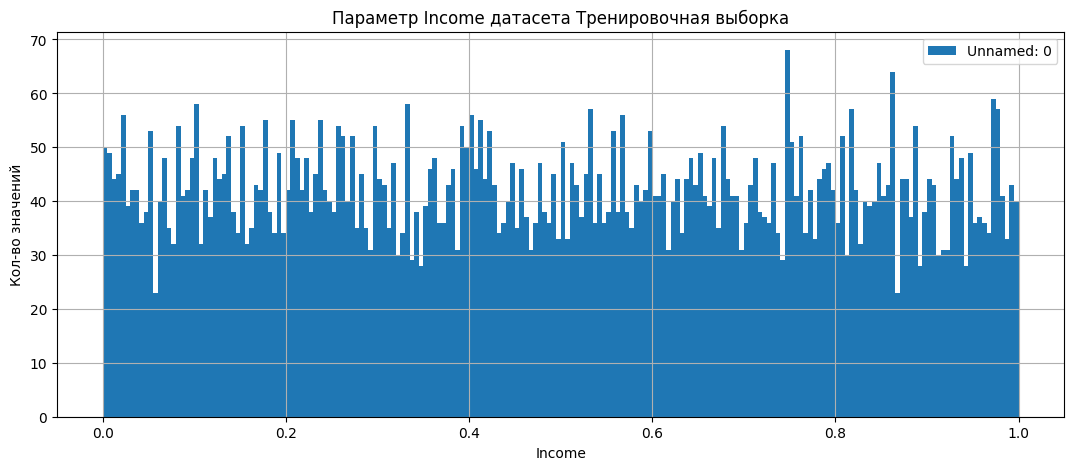

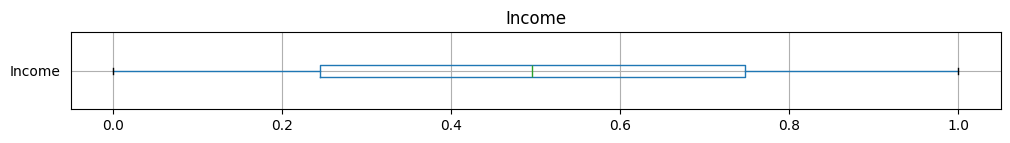

count    8442.000000
mean        0.496089
std         0.288767
min         0.000000
25%         0.244591
50%         0.496052
75%         0.747603
max         1.000000
Name: Income, dtype: float64

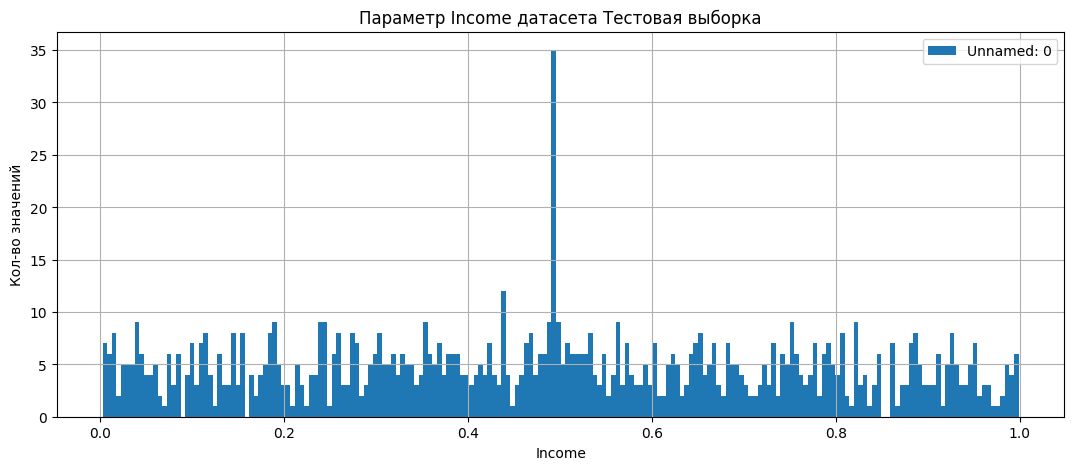

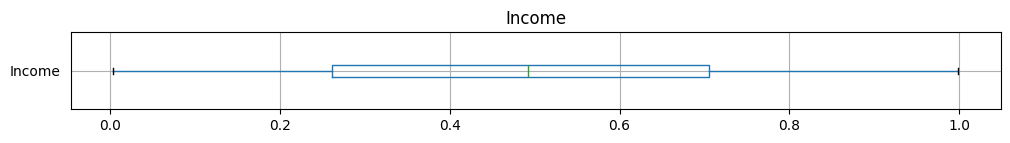

count    966.000000
mean       0.484408
std        0.273879
min        0.003351
25%        0.261447
50%        0.492015
75%        0.705371
max        0.998885
Name: Income, dtype: float64

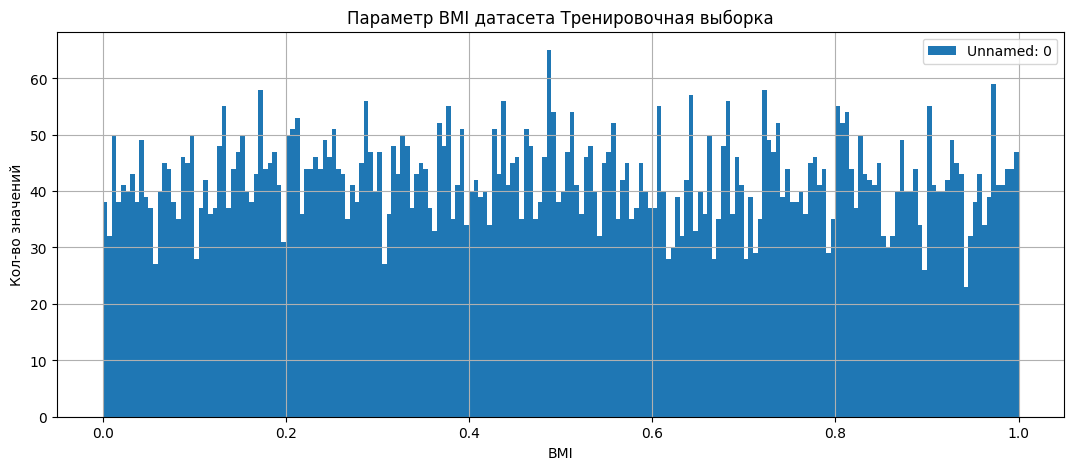

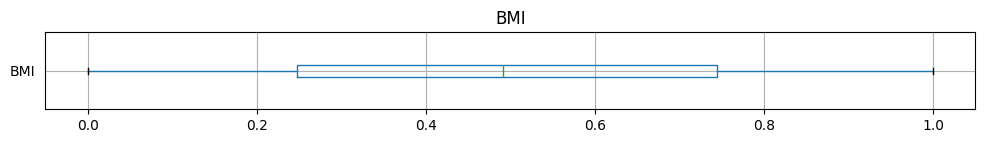

count    8442.000000
mean        0.496831
std         0.286599
min         0.000000
25%         0.247935
50%         0.490801
75%         0.744398
max         1.000000
Name: BMI, dtype: float64

count    966.000000
mean       0.476796
std        0.291987
min        0.002598
25%        0.217528
50%        0.471185
75%        0.720503
max        0.999496
Name: BMI, dtype: float64

count    8442.000000
mean        0.505539
std         0.290412
min         0.000000
25%         0.257143
50%         0.507792
75%         0.758442
max         1.000000
Name: Triglycerides, dtype: float64

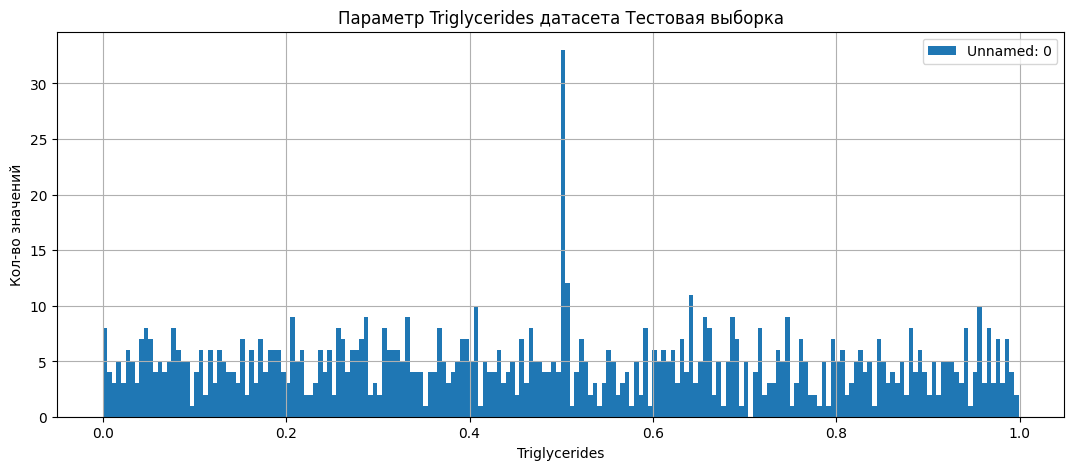

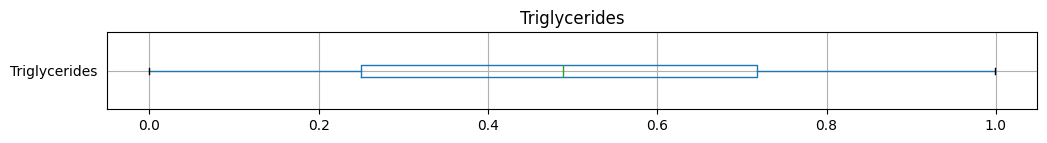

count    966.000000
mean       0.486688
std        0.284534
min        0.000000
25%        0.249675
50%        0.488961
75%        0.718182
max        0.998701
Name: Triglycerides, dtype: float64

count    8442.000000
mean        0.503712
std         0.332749
min         0.000000
25%         0.166667
50%         0.500000
75%         0.833333
max         1.000000
Name: Sleep Hours Per Day, dtype: float64

count    966.000000
mean       0.512571
std        0.322292
min        0.000000
25%        0.166667
50%        0.500000
75%        0.833333
max        1.000000
Name: Sleep Hours Per Day, dtype: float64

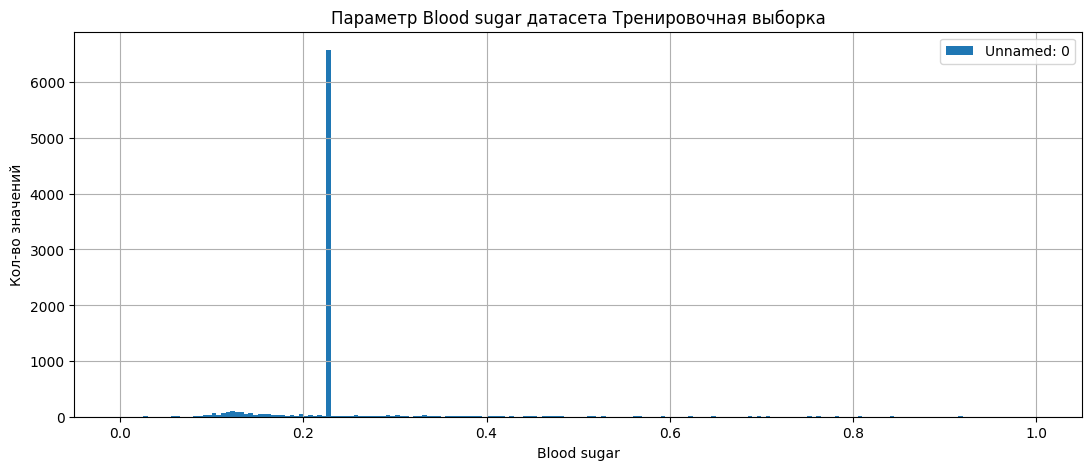

count    8442.000000
mean        0.227999
std         0.074623
min         0.000000
25%         0.227018
50%         0.227018
75%         0.227018
max         1.000000
Name: Blood sugar, dtype: float64

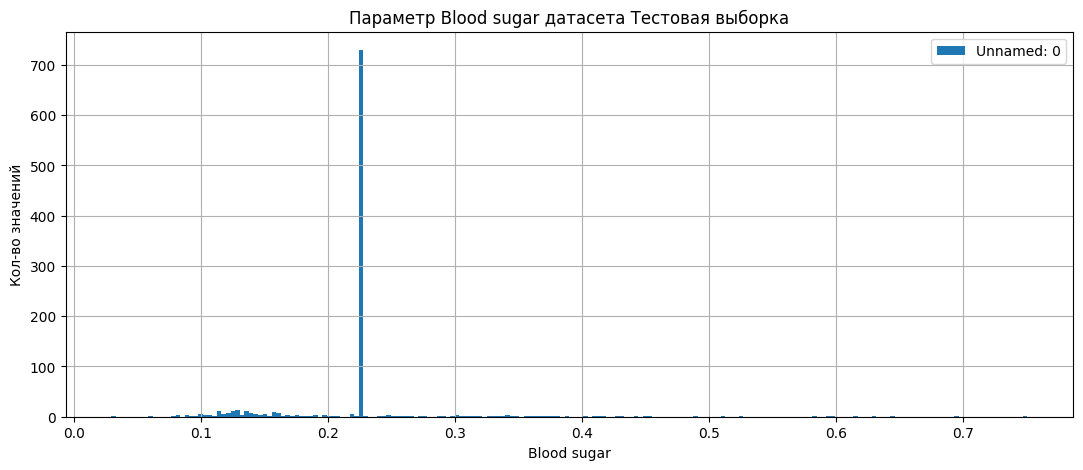

count    966.000000
mean       0.224127
std        0.065270
min        0.029644
25%        0.227018
50%        0.227018
75%        0.227018
max        0.750988
Name: Blood sugar, dtype: float64

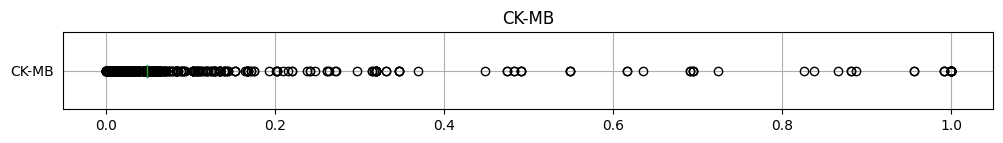

count    8442.000000
mean        0.047745
std         0.070399
min         0.000000
25%         0.048229
50%         0.048229
75%         0.048229
max         1.000000
Name: CK-MB, dtype: float64

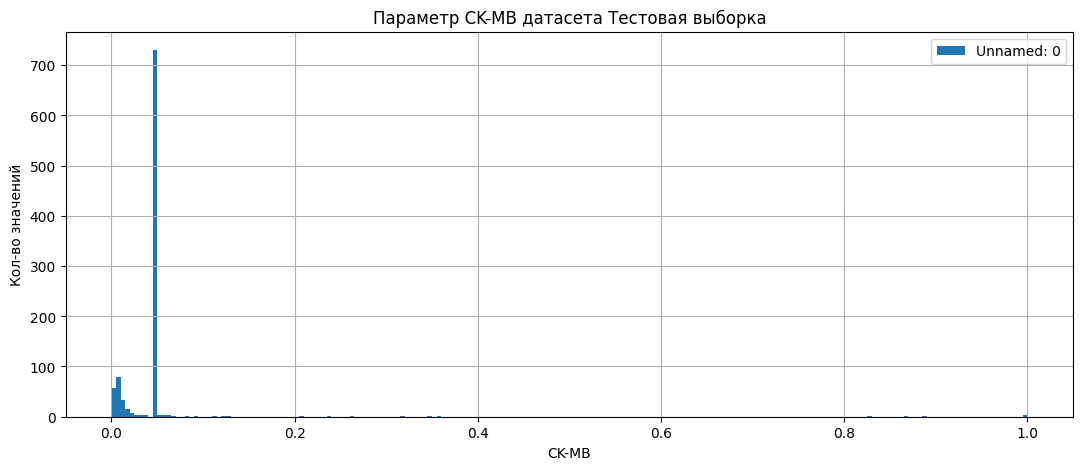

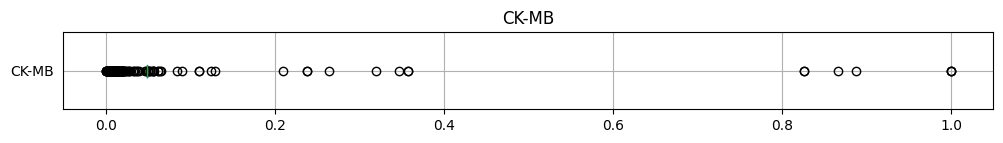

count    966.000000
mean       0.048855
std        0.079742
min        0.000000
25%        0.048229
50%        0.048229
75%        0.048229
max        1.000000
Name: CK-MB, dtype: float64

count    8442.000000
mean        0.036867
std         0.059284
min         0.000000
25%         0.036512
50%         0.036512
75%         0.036512
max         1.000000
Name: Troponin, dtype: float64

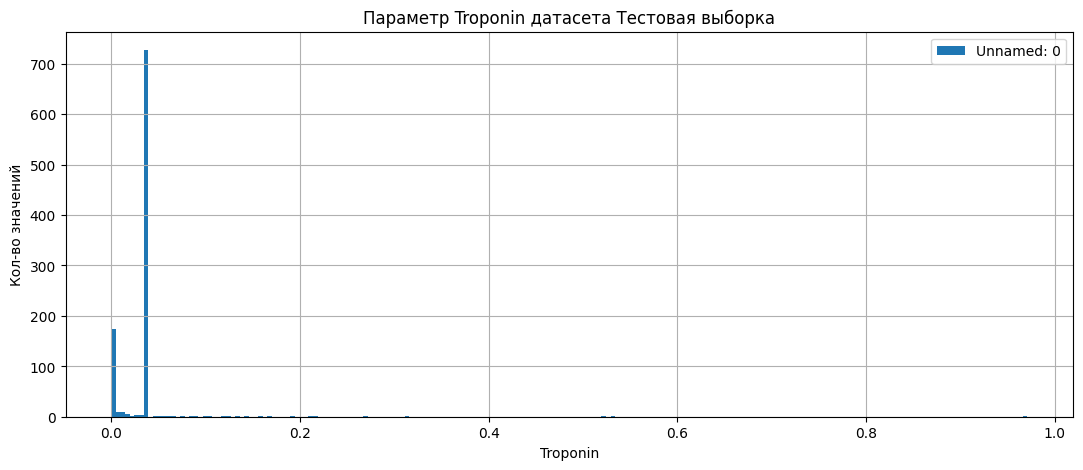

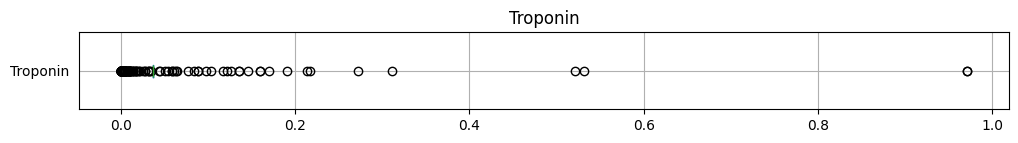

count    966.000000
mean       0.034926
std        0.053855
min        0.000194
25%        0.036512
50%        0.036512
75%        0.036512
max        0.970871
Name: Troponin, dtype: float64

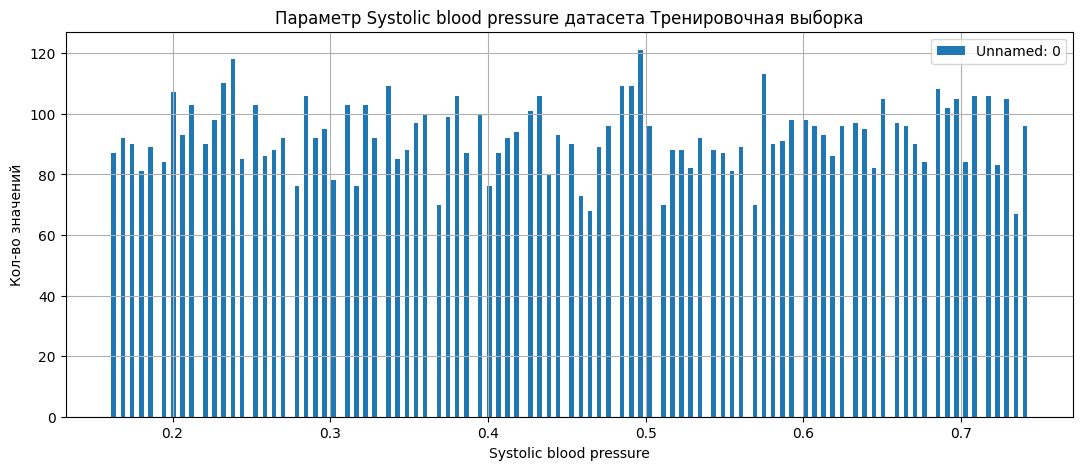

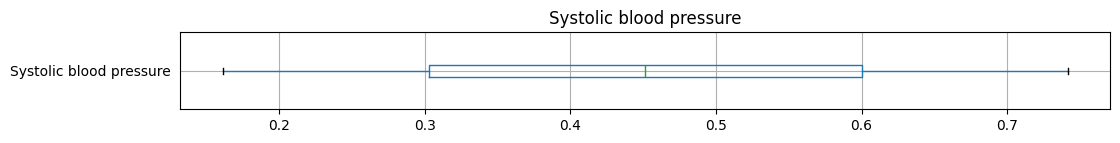

count    8442.000000
mean        0.451955
std         0.170187
min         0.161290
25%         0.303226
50%         0.451613
75%         0.600000
max         0.741935
Name: Systolic blood pressure, dtype: float64

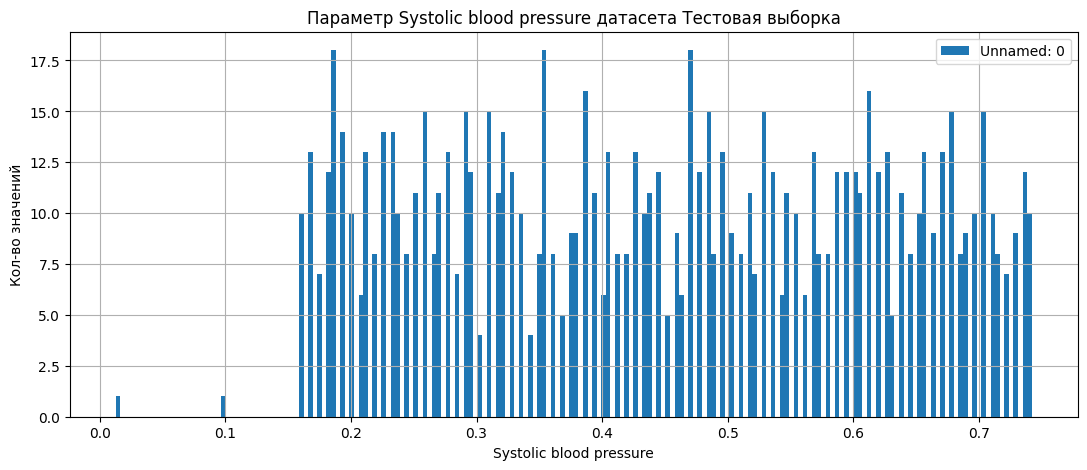

count    966.000000
mean       0.447172
std        0.171837
min        0.012903
25%        0.296774
50%        0.445161
75%        0.600000
max        0.741935
Name: Systolic blood pressure, dtype: float64

count    8442.000000
mean        0.501672
std         0.170302
min         0.209302
25%         0.348837
50%         0.500000
75%         0.651163
max         0.790698
Name: Diastolic blood pressure, dtype: float64

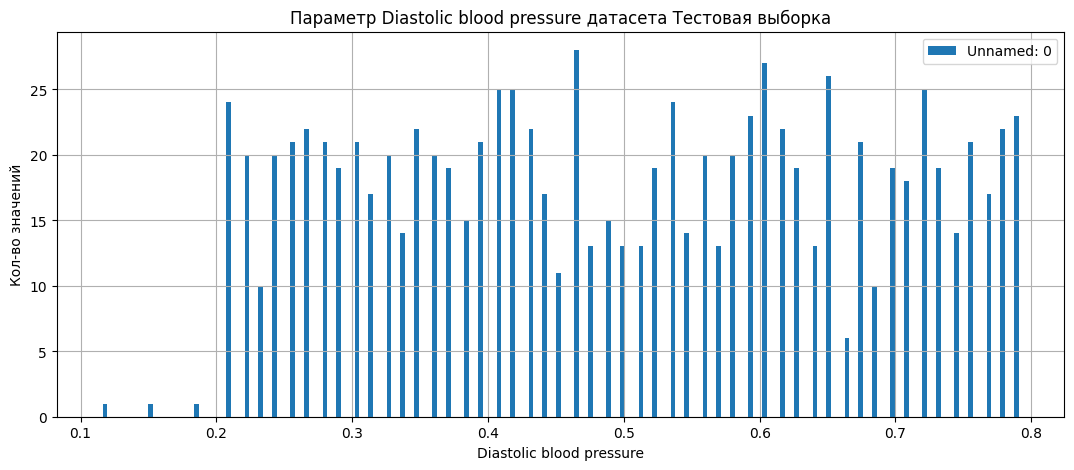

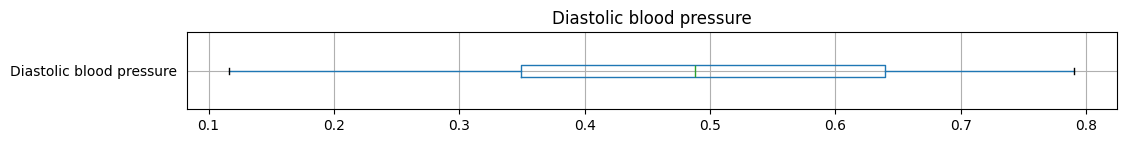

count    966.000000
mean       0.496822
std        0.173935
min        0.116279
25%        0.348837
50%        0.488372
75%        0.639535
max        0.790698
Name: Diastolic blood pressure, dtype: float64

In [28]:
hist_boxplot()

### Влияние категориальных признаков на таргет

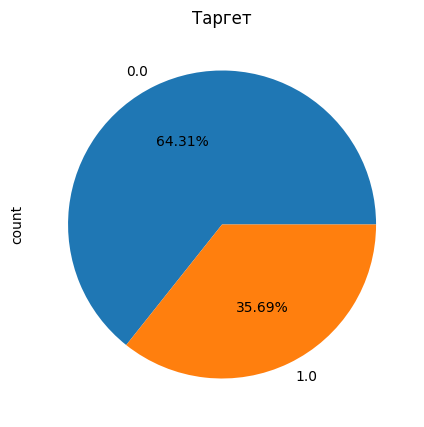

In [29]:
#таргет
heart_train['Heart Attack Risk (Binary)'].value_counts().plot(figsize = (5,5),
kind = 'pie', autopct = '%1.2f%%')
plt.title('Таргет');

In [30]:
# Функция отображения графиков:
def influence_on_target():
    parametr = ['Smoking', 'Diabetes', 'Family History', 'Obesity', 'Alcohol Consumption', 'Physical Activity Days Per Week',
               'Diet','Previous Heart Problems', 'Medication Use','Stress Level','Physical Activity Days Per Week', 'Gender']

    for cat_feature in parametr:

        print(f'Анализ признака {cat_feature}')

        tabl = pd.concat([heart_train[cat_feature].value_counts()], axis=1)

        tabl.columns= [f'Кол-во пациентов по признаку {cat_feature}']

        tabl[f'(%) от общего кол-ва пациентов по признаку {cat_feature}'] = round((tabl[f'Кол-во пациентов по признаку {cat_feature}'] /
        heart_train[cat_feature].value_counts().sum())*100,2)

        tabl[f'Количество пациентов с высоким риском по признаку {cat_feature}']\
        = heart_train.groupby(cat_feature)['Heart Attack Risk (Binary)'].sum()

        tabl[f'% пациентов с высоким риском от кол-ва пациентов по признаку {cat_feature}']\
        = round((tabl[f'Количество пациентов с высоким риском по признаку {cat_feature}'] /
        tabl[f'Кол-во пациентов по признаку {cat_feature}'])*100,2)

        tabl[f'% распределения по признаку {cat_feature} среди пациентов с высоким риском'] = round((tabl[f'Количество пациентов с высоким риском по признаку {cat_feature}']/
        len(heart_train.loc[heart_train['Heart Attack Risk (Binary)'] == 1]))*100,2)
        display(tabl);
        #-----------------------------------------------------------------------
        heart_train[cat_feature].value_counts().plot(figsize = (5,5),
        kind = 'pie', autopct = '%1.2f%%')
        plt.title(f"Круговая диаграмма {cat_feature} датасета heart_train")
        plt.show();

        #------------------------------------
        plt.hist([heart_train.loc[heart_train['Heart Attack Risk (Binary)'] == 0][cat_feature],\
        heart_train.loc[heart_train['Heart Attack Risk (Binary)'] == 1][cat_feature]],\
        bins=40, stacked=True,color=['cyan', 'Purple'], edgecolor='black')
        plt.xlabel(cat_feature)
        plt.ylabel('Кол-во пациентов')
        plt.title(f'Доли пациентов с высоким и низким риском по признаку {cat_feature}')
        plt.legend([f'Heart Attack Risk (Binary),{1}',\
        f'Heart Attack Risk (Binary),{0}']);
        plt.show()
        print('------------------------------------------------------------------------------')



Анализ признака Smoking


Кол-во пациентов по признаку Smoking  \
Smoking                                         
1.0                                      7622   
0.0                                       820   

         (%) от общего кол-ва пациентов по признаку Smoking  \
Smoking                                                       
1.0                                                   90.29   
0.0                                                    9.71   

         Количество пациентов с высоким риском по признаку Smoking  \
Smoking                                                              
1.0                                                         2714.0   
0.0                                                          299.0   

         % пациентов с высоким риском от кол-ва пациентов по признаку Smoking  \
Smoking                                                                         
1.0                                                                     35.61   
0.0                                                                     36.46   

         % распределения по признаку Smoking среди пациентов с высоким риском  
Smoking                                                                        
1.0                                                                     90.08  
0.0                                                                      9.92

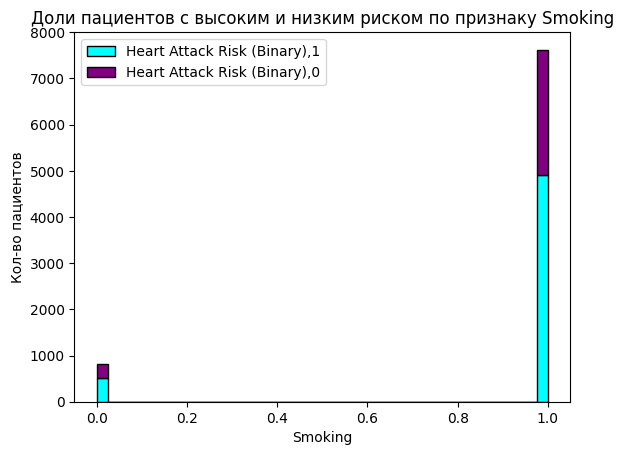

------------------------------------------------------------------------------
Анализ признака Diabetes


Кол-во пациентов по признаку Diabetes  \
Diabetes                                          
1.0                                        5505   
0.0                                        2937   

          (%) от общего кол-ва пациентов по признаку Diabetes  \
Diabetes                                                        
1.0                                                     65.21   
0.0                                                     34.79   

          Количество пациентов с высоким риском по признаку Diabetes  \
Diabetes                                                               
1.0                                                           1996.0   
0.0                                                           1017.0   

          % пациентов с высоким риском от кол-ва пациентов по признаку Diabetes  \
Diabetes                                                                          
1.0                                                                       36.26   
0.0                                                                       34.63   

          % распределения по признаку Diabetes среди пациентов с высоким риском  
Diabetes                                                                         
1.0                                                                       66.25  
0.0                                                                       33.75

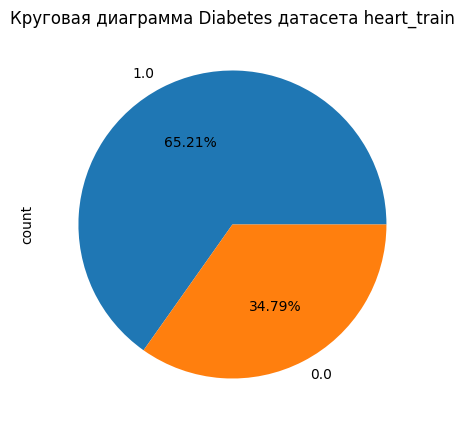

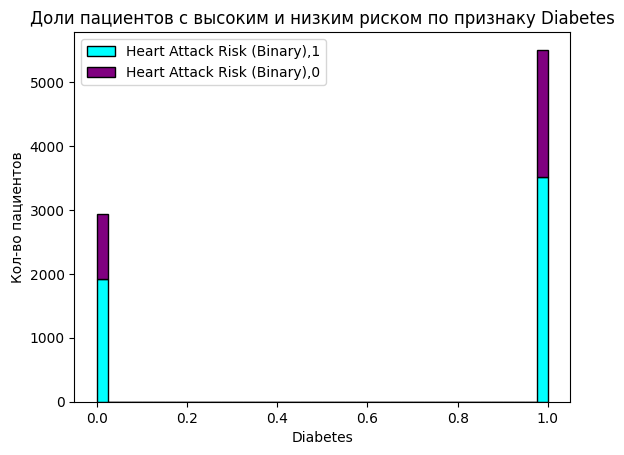

------------------------------------------------------------------------------
Анализ признака Family History


Кол-во пациентов по признаку Family History  \
Family History                                                
0.0                                                    4309   
1.0                                                    4133   

                (%) от общего кол-ва пациентов по признаку Family History  \
Family History                                                              
0.0                                                                 51.04   
1.0                                                                 48.96   

                Количество пациентов с высоким риском по признаку Family History  \
Family History                                                                     
0.0                                                                       1532.0   
1.0                                                                       1481.0   

                % пациентов с высоким риском от кол-ва пациентов по признаку Family History  \
Family History                                                                                
0.0                                                                                   35.55   
1.0                                                                                   35.83   

                % распределения по признаку Family History среди пациентов с высоким риском  
Family History                                                                               
0.0                                                                                   50.85  
1.0                                                                                   49.15

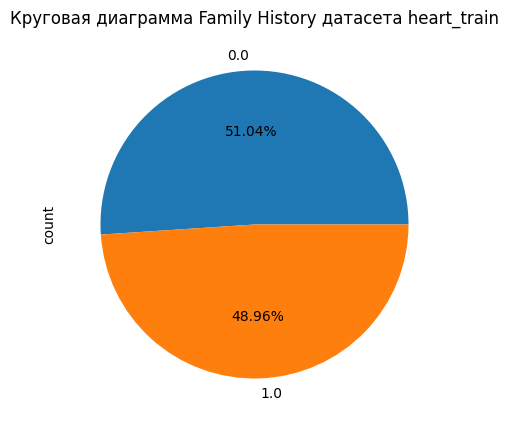

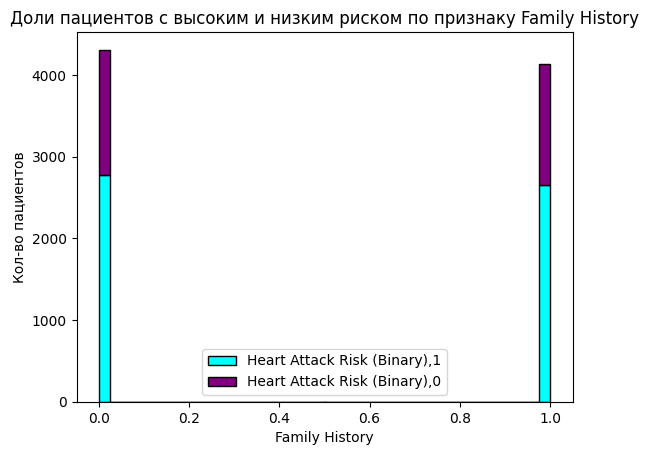

------------------------------------------------------------------------------
Анализ признака Obesity


Кол-во пациентов по признаку Obesity  \
Obesity                                         
0.0                                      4235   
1.0                                      4207   

         (%) от общего кол-ва пациентов по признаку Obesity  \
Obesity                                                       
0.0                                                   50.17   
1.0                                                   49.83   

         Количество пациентов с высоким риском по признаку Obesity  \
Obesity                                                              
0.0                                                         1542.0   
1.0                                                         1471.0   

         % пациентов с высоким риском от кол-ва пациентов по признаку Obesity  \
Obesity                                                                         
0.0                                                                     36.41   
1.0                                                                     34.97   

         % распределения по признаку Obesity среди пациентов с высоким риском  
Obesity                                                                        
0.0                                                                     51.18  
1.0                                                                     48.82

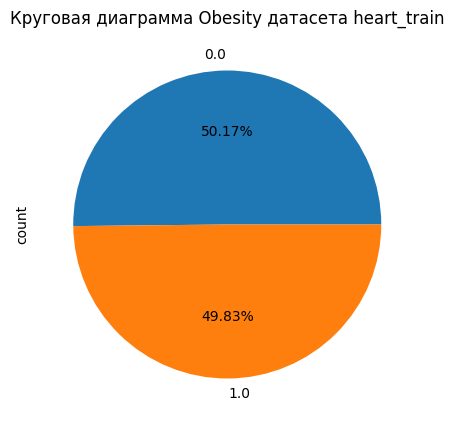

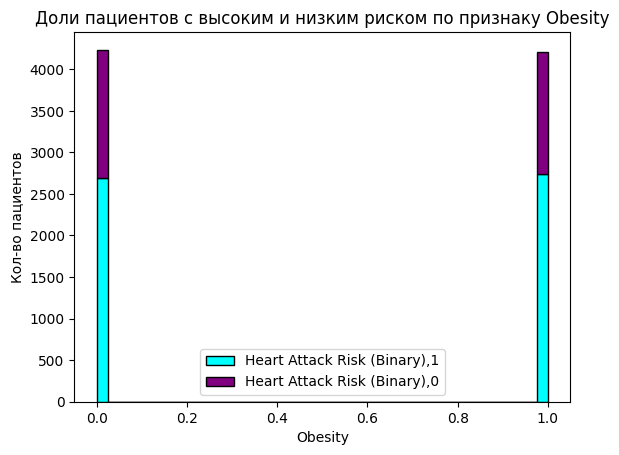

------------------------------------------------------------------------------
Анализ признака Alcohol Consumption


Кол-во пациентов по признаку Alcohol Consumption  \
Alcohol Consumption                                                     
1.0                                                              5082   
0.0                                                              3360   

                     (%) от общего кол-ва пациентов по признаку Alcohol Consumption  \
Alcohol Consumption                                                                   
1.0                                                                            60.2   
0.0                                                                            39.8   

                     Количество пациентов с высоким риском по признаку Alcohol Consumption  \
Alcohol Consumption                                                                          
1.0                                                                                 1785.0   
0.0                                                                                 1228.0   

                     % пациентов с высоким риском от кол-ва пациентов по признаку Alcohol Consumption  \
Alcohol Consumption                                                                                     
1.0                                                                                             35.12   
0.0                                                                                             36.55   

                     % распределения по признаку Alcohol Consumption среди пациентов с высоким риском  
Alcohol Consumption                                                                                    
1.0                                                                                             59.24  
0.0                                                                                             40.76

------------------------------------------------------------------------------
Анализ признака Physical Activity Days Per Week


Кол-во пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                 
3.0                                                                                      1091   
2.0                                                                                      1087   
1.0                                                                                      1069   
7.0                                                                                      1063   
6.0                                                                                      1055   
5.0                                                                                      1046   
4.0                                                                                      1025   
0.0                                                                                      1006   

                                 (%) от общего кол-ва пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                               
3.0                                                                                                   12.92   
2.0                                                                                                   12.88   
1.0                                                                                                   12.66   
7.0                                                                                                   12.59   
6.0                                                                                                   12.50   
5.0                                                                                                   12.39   
4.0                                                                                                   12.14   
0.0                                                                                                   11.92   

                                 Количество пациентов с высоким риском по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                                      
3.0                                                                                                          379.0   
2.0                                                                                                          397.0   
1.0                                                                                                          367.0   
7.0                                                                                                          386.0   
6.0                                                                                                          368.0   
5.0                                                                                                          355.0   
4.0                                                                                                          368.0   
0.0                                                                                                          393.0   

                                 % пациентов с высоким риском от кол-ва пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                                                 
3.0                                                                                                                     34.74   
2.0                                                                                                                     36.52   
1.0                                                                                                                     34.33   
7.0                                                                                                                     36.31

------------------------------------------------------------------------------
Анализ признака Diet


Кол-во пациентов по признаку Diet  \
Diet                                      
1                                  2863   
2                                  2796   
0                                  2783   

      (%) от общего кол-ва пациентов по признаку Diet  \
Diet                                                    
1                                               33.91   
2                                               33.12   
0                                               32.97   

      Количество пациентов с высоким риском по признаку Diet  \
Diet                                                           
1                                                     1058.0   
2                                                      985.0   
0                                                      970.0   

      % пациентов с высоким риском от кол-ва пациентов по признаку Diet  \
Diet                                                                      
1                                                                 36.95   
2                                                                 35.23   
0                                                                 34.85   

      % распределения по признаку Diet среди пациентов с высоким риском  
Diet                                                                     
1                                                                 35.11  
2                                                                 32.69  
0                                                                 32.19

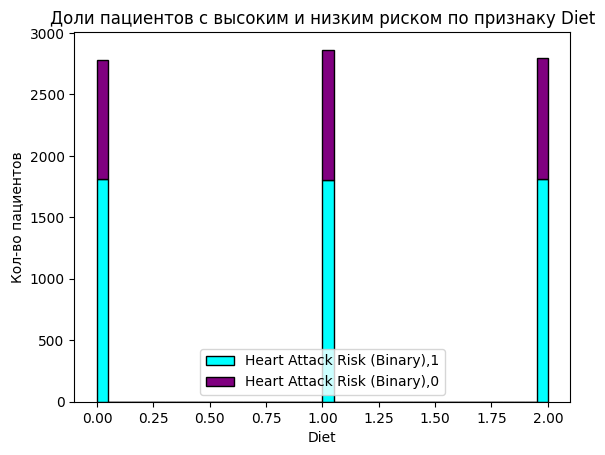

------------------------------------------------------------------------------
Анализ признака Previous Heart Problems


Кол-во пациентов по признаку Previous Heart Problems  \
Previous Heart Problems                                                         
0.0                                                                      4260   
1.0                                                                      4182   

                         (%) от общего кол-ва пациентов по признаку Previous Heart Problems  \
Previous Heart Problems                                                                       
0.0                                                                                   50.46   
1.0                                                                                   49.54   

                         Количество пациентов с высоким риском по признаку Previous Heart Problems  \
Previous Heart Problems                                                                              
0.0                                                                                         1517.0   
1.0                                                                                         1496.0   

                         % пациентов с высоким риском от кол-ва пациентов по признаку Previous Heart Problems  \
Previous Heart Problems                                                                                         
0.0                                                                                                     35.61   
1.0                                                                                                     35.77   

                         % распределения по признаку Previous Heart Problems среди пациентов с высоким риском  
Previous Heart Problems                                                                                        
0.0                                                                                                     50.35  
1.0                                                                                                     49.65

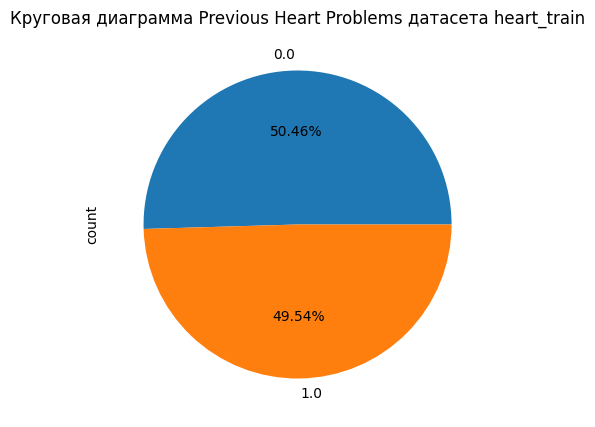

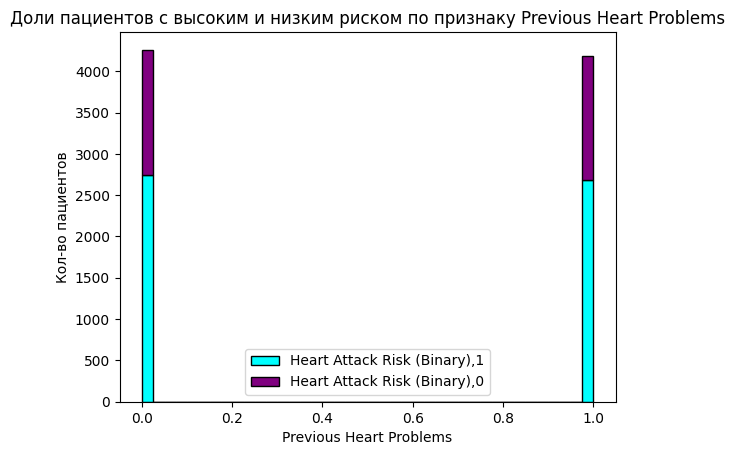

------------------------------------------------------------------------------
Анализ признака Medication Use


Кол-во пациентов по признаку Medication Use  \
Medication Use                                                
1.0                                                    4231   
0.0                                                    4211   

                (%) от общего кол-ва пациентов по признаку Medication Use  \
Medication Use                                                              
1.0                                                                 50.12   
0.0                                                                 49.88   

                Количество пациентов с высоким риском по признаку Medication Use  \
Medication Use                                                                     
1.0                                                                       1511.0   
0.0                                                                       1502.0   

                % пациентов с высоким риском от кол-ва пациентов по признаку Medication Use  \
Medication Use                                                                                
1.0                                                                                   35.71   
0.0                                                                                   35.67   

                % распределения по признаку Medication Use среди пациентов с высоким риском  
Medication Use                                                                               
1.0                                                                                   50.15  
0.0                                                                                   49.85

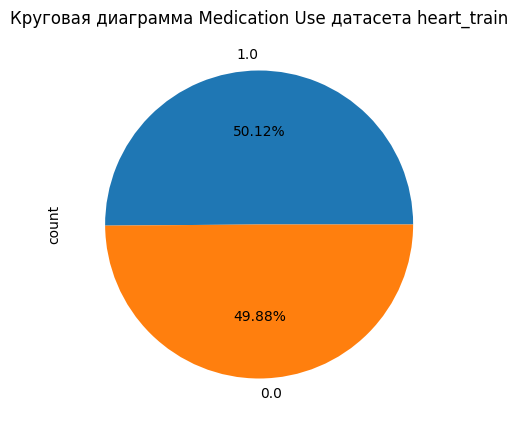

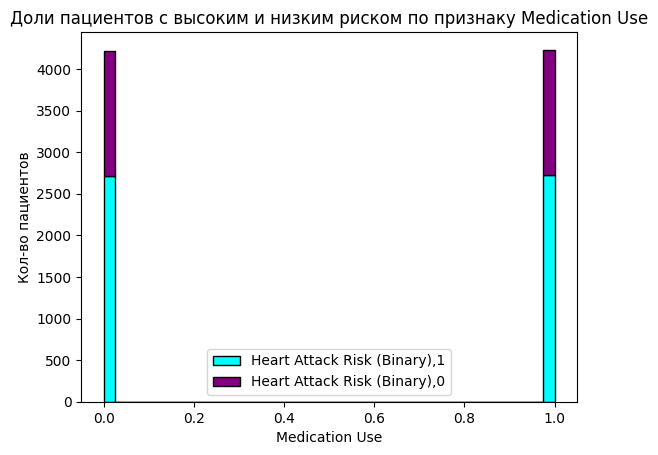

------------------------------------------------------------------------------
Анализ признака Stress Level


Кол-во пациентов по признаку Stress Level  \
Stress Level                                              
7.0                                                 869   
4.0                                                 857   
2.0                                                 854   
9.0                                                 852   
8.0                                                 844   
3.0                                                 841   
1.0                                                 840   
5.0                                                 833   
6.0                                                 828   
10.0                                                824   

              (%) от общего кол-ва пациентов по признаку Stress Level  \
Stress Level                                                            
7.0                                                             10.29   
4.0                                                             10.15   
2.0                                                             10.12   
9.0                                                             10.09   
8.0                                                             10.00   
3.0                                                              9.96   
1.0                                                              9.95   
5.0                                                              9.87   
6.0                                                              9.81   
10.0                                                             9.76   

              Количество пациентов с высоким риском по признаку Stress Level  \
Stress Level                                                                   
7.0                                                                    318.0   
4.0                                                                    300.0   
2.0                                                                    311.0   
9.0                                                                    283.0   
8.0                                                                    295.0   
3.0                                                                    295.0   
1.0                                                                    292.0   
5.0                                                                    313.0   
6.0                                                                    318.0   
10.0                                                                   288.0   

              % пациентов с высоким риском от кол-ва пациентов по признаку Stress Level  \
Stress Level                                                                              
7.0                                                                               36.59   
4.0                                                                               35.01   
2.0                                                                               36.42   
9.0                                                                               33.22   
8.0                                                                               34.95   
3.0                                                                               35.08   
1.0                                                                               34.76   
5.0                                                                               37.58   
6.0                                                                               38.41   
10.0                                                                              34.95   

              % распределения по признаку Stress Level среди пациентов с высоким риском  
Stress Level                                                                             
7.0                                                                               10.55  
4.0                                                                                9.96  
2.0           

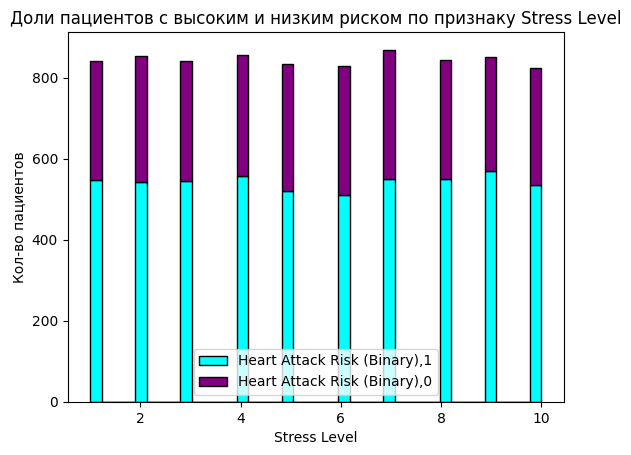

------------------------------------------------------------------------------
Анализ признака Physical Activity Days Per Week


Кол-во пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                 
3.0                                                                                      1091   
2.0                                                                                      1087   
1.0                                                                                      1069   
7.0                                                                                      1063   
6.0                                                                                      1055   
5.0                                                                                      1046   
4.0                                                                                      1025   
0.0                                                                                      1006   

                                 (%) от общего кол-ва пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                               
3.0                                                                                                   12.92   
2.0                                                                                                   12.88   
1.0                                                                                                   12.66   
7.0                                                                                                   12.59   
6.0                                                                                                   12.50   
5.0                                                                                                   12.39   
4.0                                                                                                   12.14   
0.0                                                                                                   11.92   

                                 Количество пациентов с высоким риском по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                                      
3.0                                                                                                          379.0   
2.0                                                                                                          397.0   
1.0                                                                                                          367.0   
7.0                                                                                                          386.0   
6.0                                                                                                          368.0   
5.0                                                                                                          355.0   
4.0                                                                                                          368.0   
0.0                                                                                                          393.0   

                                 % пациентов с высоким риском от кол-ва пациентов по признаку Physical Activity Days Per Week  \
Physical Activity Days Per Week                                                                                                 
3.0                                                                                                                     34.74   
2.0                                                                                                                     36.52   
1.0                                                                                                                     34.33   
7.0                                                                                                                     36.31

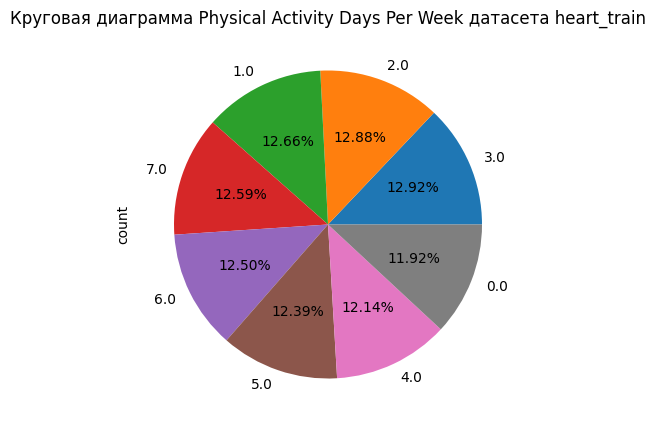

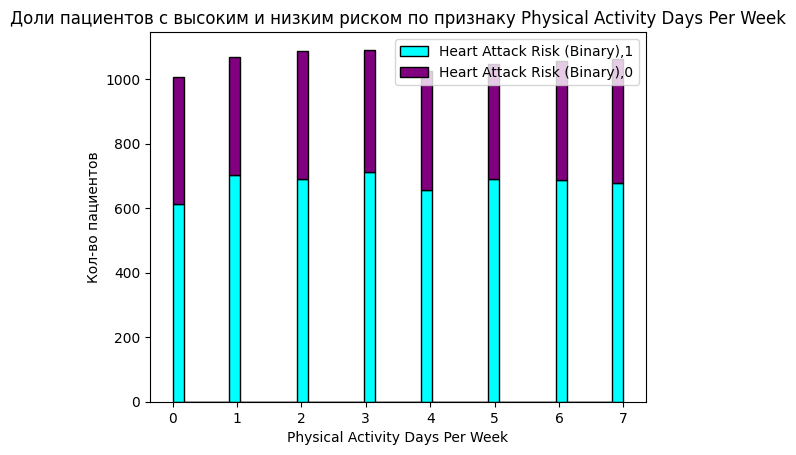

------------------------------------------------------------------------------
Анализ признака Gender


Кол-во пациентов по признаку Gender  \
Gender                                        
Male                                   5882   
Female                                 2560   

        (%) от общего кол-ва пациентов по признаку Gender  \
Gender                                                      
Male                                                69.68   
Female                                              30.32   

        Количество пациентов с высоким риском по признаку Gender  \
Gender                                                             
Male                                                      2113.0   
Female                                                     900.0   

        % пациентов с высоким риском от кол-ва пациентов по признаку Gender  \
Gender                                                                        
Male                                                                  35.92   
Female                                                                35.16   

        % распределения по признаку Gender среди пациентов с высоким риском  
Gender                                                                       
Male                                                                  70.13  
Female                                                                29.87

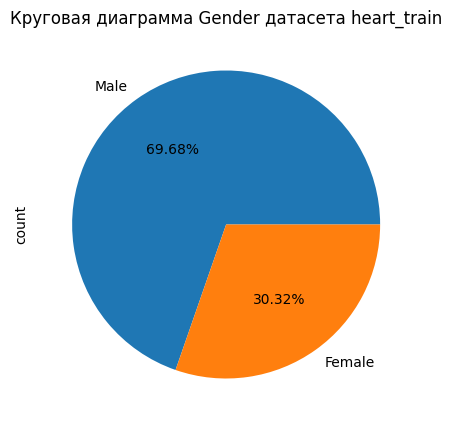

------------------------------------------------------------------------------


In [31]:
influence_on_target()

**Подробные пояснения по таблице на примере признака Smoking.**

Индексы 1.0 и 0.0  - это значения признака Smoking:

- 1.0 - куряший пациент
- 0.0  - некурящий

    1. Столбец "Кол-во пациентов по признаку Smoking" - кол-во курящих и не курящих пациентов в датасете;
    2. Столбец "(%) от общего кол-ва пациентов по признаку Smoking" - процентное соотношение курящих и не курящих в датасете (также см. круговую диаграмму);
    3. Столбец "Количество пациентов с высоким риском по признаку Smoking" - из 7622 курящих 2714 с высоким риском, из 820 не курящих 299 с высоким риском;
    4. Столбец "% пациентов с высоким риском от кол-ва пациентов по признаку Smoking" - показывает на основе столбца 3 процентное соотношение пациентов с риском среди курящих и не курящих. В данном случае примерное равенство говорит о зависимости таргета от признака Smoking, близкой к линейной (схожесть пропорций).
    5. Столбец "% распределения по признаку Smoking среди пациентов с высоким риском" - какой процент КУРЯЩИХ с высоким и низким риском сердечных заболеваний от общего кол-ва КУРЯЩИХ.





### Влияние количественных признаков на таргет

In [32]:
# Функция отображения графиков:
def quantitative_feature():

    parametr = ['Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week', 'Diet',
               'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
               'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood sugar',
               'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure']

    for cat_feature in parametr:
        plt.hist([heart_train.loc[heart_train['Heart Attack Risk (Binary)'] == 0][cat_feature],\
        heart_train.loc[heart_train['Heart Attack Risk (Binary)'] == 1][cat_feature]],\
        bins=40, stacked=True,color=['cyan', 'Purple'], edgecolor='black')
        plt.xlabel(cat_feature)
        plt.ylabel('Кол-во пациентов')
        plt.title(f'Доли пациентов с высоким и низким риском по признаку {cat_feature}')
        plt.legend([f'Heart Attack Risk (Binary),{1}',\
        f'Heart Attack Risk (Binary),{0}']);
        plt.show()

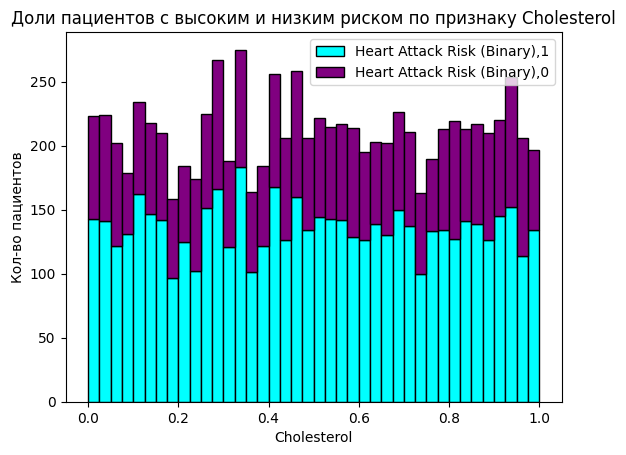

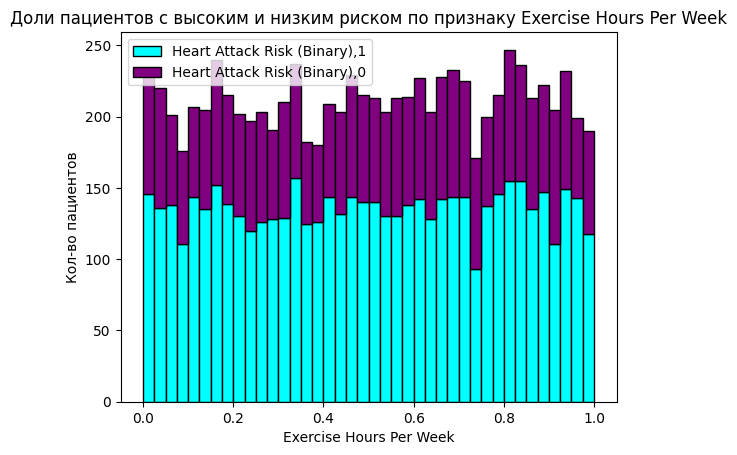

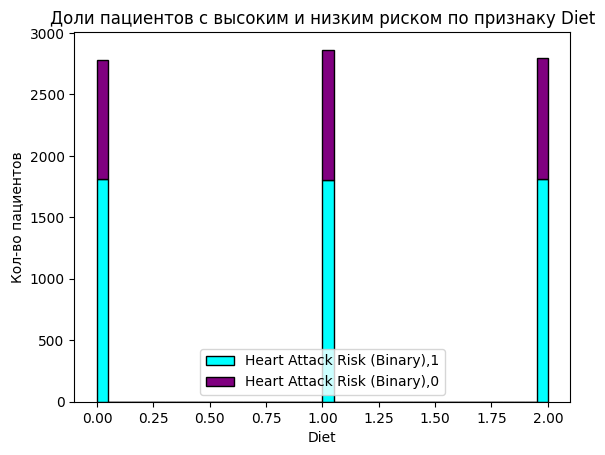

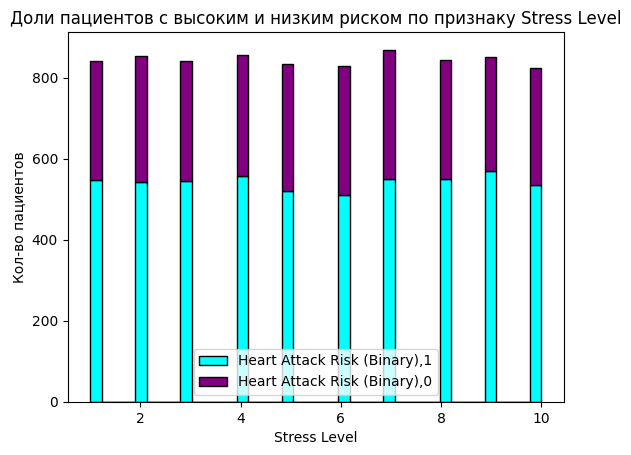

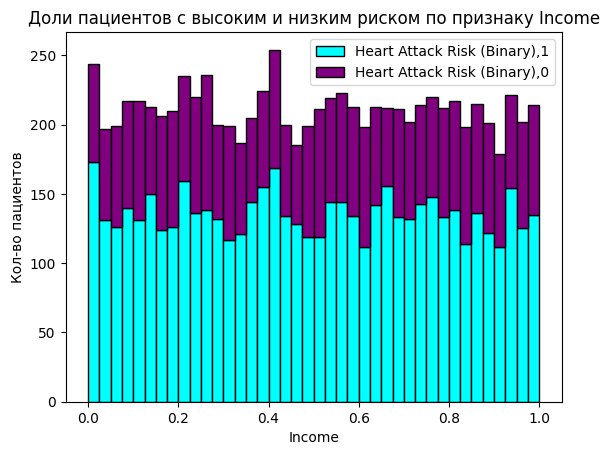

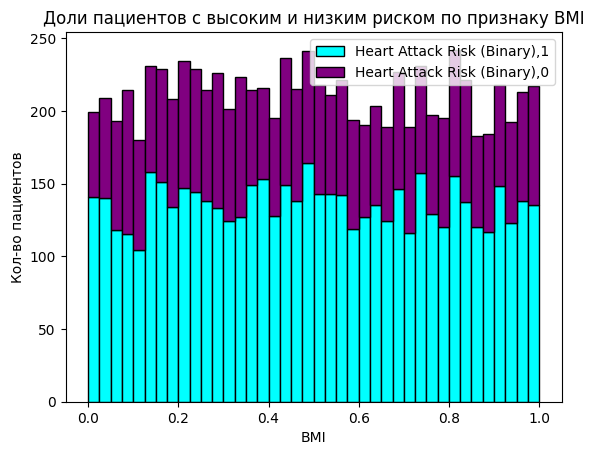

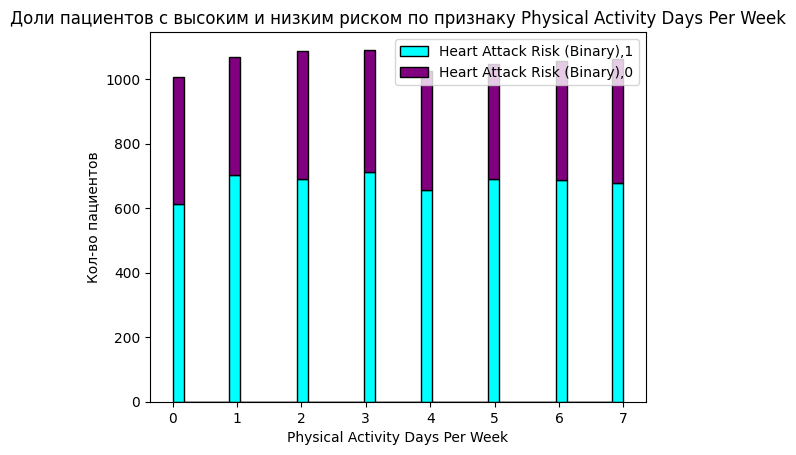

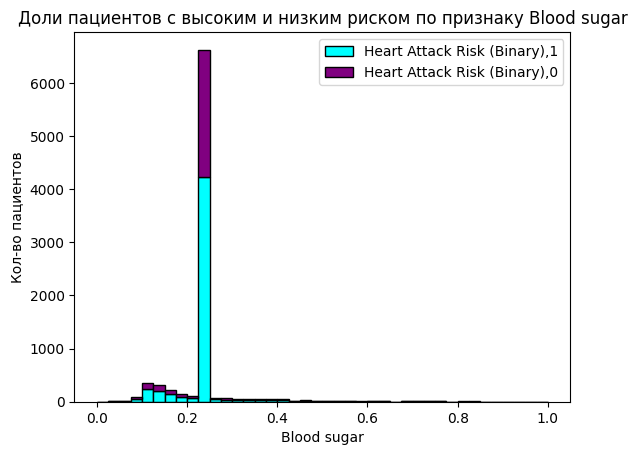

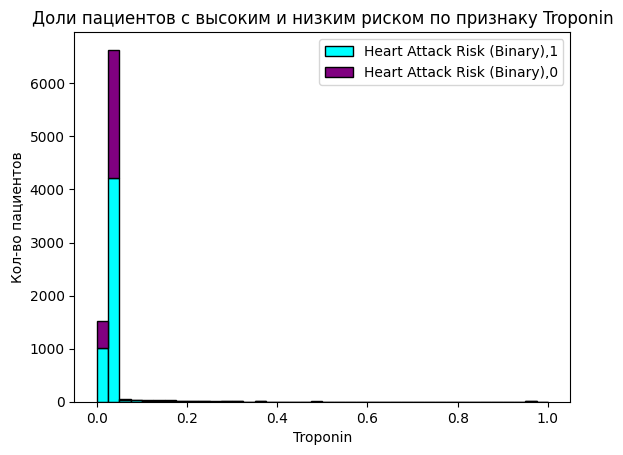

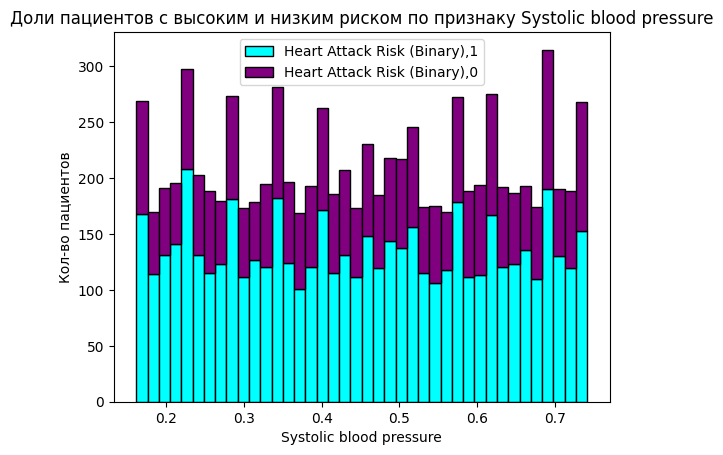

In [33]:
quantitative_feature()

### Матрица корелляции

In [34]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8442 non-null   int64  
 1   Age                              8442 non-null   float64
 2   Cholesterol                      8442 non-null   float64
 3   Heart rate                       8442 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8442 non-null   float64
 10  Diet                             8442 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use           

**Описание признаков и зависимостей :**

1. **Age:** возраст.

Распределение, близкое к равномерному. Без выбросов и аномалий.
2. **Cholesterol:** холестерин

Распределение, близкое к равномерному. Без выбросов.В тестовой выборке есть аномальный пик в районе медианного значения.

3. **Heart rate:** частота биения сердца

Распределение, близкое к равномерному. В тестовой выборке есть выброс - значение 1.0

4. **Diabetes :** диабет (категориальное: 1 -да)

65.21% - диабетики, из которых 66.25% с высоким риском сердечных приступов

5. **Family History :** Наследственные заболевания (категориальное: 1 -да)

51.04% имеют наследственные заболевания, из которых 49.15 % с высоким риском сердечных приступов

6. **Smoking :**  Курение (категориальное: 1 -да)

90.29% пациенты курят, из которых 90.08 % с высоким риском сердечных приступов

7. **Obesity :** Ожирение (категориальное: 1 -да)

49.83 % пациентов страдают ожирением, их которых 48.82 % с высоким риском сердечных приступов

8. **Alcohol Consumption :** Употребление алкоголя (категориальное: 1 -да)

60.2% пациентов употребляют алкоголь, из которых 59.24 % с высоким риском сердечных приступов

9. **Exercise Hours Per Week :**    Кол-во Часов упражнений в Неделю (8 значений от 0 до 7)

Распределение, близкое к равномерному. Без выбросов и аномалий.

10. **Diet :**   Диета (категориальное: 4 значения 0 - 3)

В тренировочной выборке равномерно распределенный признак - равные доли пациентов с разными диетами, и в них равные доли пациентов в риском заболевания и без.
Выбросов и аномалий нет, при этом
**Диета № 3 - отсутствует в тренировочной выборке, но есть в тестовой.**

11. **Previous Heart Problems  :**  Предыдущие проблемы с сердцем
(категориальное: 1 -да)

49.54 % с предыдущими проблемами, из которых 49.65 % с высоким риском сердечных приступов.

12. **Medication Use  :**  Использование лекарств  (категориальное: 1 -да)

50.12 % используют лекарства, из которых 50.15% с высоким риском сердечных приступов.

13. **Stress Level  :**  Уровень стресса (категориальное: 10 уровней)

Равномероное распределение между уровнями: 9.76 - 10.29 % распределение по долям, а также равномерное распределение
пациентов с уровнем риска

14. **Sedentary Hours Per Day :**  Кол-во сидячих часов в день

Распределение, близкое к равномерному. Без выбросов и аномалий в тренировочной выборке. В тестовой выборке аномальное ко-во пациентов с медианным значением  Sedentary Hours Per Day - около 36.


15. **Income   :**  Уровень дохода

Распределение, близкое к равномерному. Без выбросов и аномалий в тренировочной выборке. В тестовой выборке аномальное ко-во пациентов с медианным значением  Income - около 36.

16. **BMI  :**  Body Mass Index

Без выбросов и аномалий в тренировочной выборке. В тестовой выборке аномальное ко-во пациентов с медианным значением  Income - около 36.

17. **Triglycerides :**  триглицериды

Без выбросов и аномалий в тренировочной выборке. В тестовой выборке аномальное ко-во пациентов с медианным значением  Triglycerides - около 36.

18. **Physical Activity Days Per Week :** Кол-во дней физической активности в Неделю (7 значений)

Равномероное распределение  по долям, а также равномерное распределение  пациентов с уровнем риска

19. **Sleep Hours Per Day  :**  Кол-во часов сна в сутки (7 значений)

Равномероное распределение  по долям, а также равномерное распределение  пациентов с уровнем риска

20. **Blood sugar :**  *Содержание сахара в крови:*




In [35]:
# Кол-во значений сахара  = 0.227018
len(heart_train.loc[heart_train['Blood sugar'] == 0.227018])

6551

6551 / 8442 *100%  :

**77.6 % значений сахара в крови равно 0.227018**

In [36]:
# % пациенов с риском от пациентов с кол-вом значений сахара  = 0.227018
round(((len(heart_train.loc[(heart_train['Blood sugar'] == 0.227018) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/6551)*100),2)

36.28

**Из которых 36.28 % пациентов с высоким риском.**

In [37]:
# % пациенов с риском от пациентов с кол-вом значений сахара  = 0.227018
round((len(heart_train.loc[(heart_train['Blood sugar'] != 0.227018) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/(8442 - 6551)*100),2)

33.63

**Из остальных 22.4 % пациентов, у которых значение сахара в крови не равно 0.227018 --  33.63 % пациентов с высоким риском**

21. **CK-MB  :**  *креатинкиназа-МВ*



In [38]:
#Кол-во значений CK-MB в крови  = 0.048229
len(heart_train.loc[heart_train['CK-MB'] == 0.048229])

6551

6551 / 8442 *100% :

**77.6 % значений CK-MB в крови = 0.048229**

In [39]:
# % пациенов с риском от пациентов с СК-МВ = 0.048229
round(((len(heart_train.loc[(heart_train['CK-MB'] == 0.048229) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/6551)*100),2)

36.28

**Из которых 36.28 % пациентов с высоким риском.**

In [40]:
# % пациенов с риском от пациентов с кол-вом значений СК-МВ != 0.048229
round((len(heart_train.loc[(heart_train['CK-MB'] != 0.048229) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/(8442 - 6551)*100),2)

33.63

**Из остальных 22.4 % пациентов, у которых значение СК-МВ не равно 0.048229 --  33.63 % пациентов с высоким риском**

22. **Troponin  :** *тропонин*

In [41]:
#Кол-во значений Troponin в крови = 0.036512
len(heart_train.loc[heart_train['Troponin'] == 0.036512])

6551

6551 / 8442 *100% :

**77.6 % значений тропонина в крови = 0.036512**

In [42]:
# % пациенов с риском от пациентов с Troponin = 0.036512
round(((len(heart_train.loc[(heart_train['Troponin'] == 0.036512) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/6551)*100),2)

36.28

**Из которых 36.28 % пациентов с высоким риском.**

In [43]:
# % пациенов с риском от пациентов с кол-вом значений Troponin не равно 0.036512
round((len(heart_train.loc[(heart_train['Troponin'] != 0.036512) &
(heart_train['Heart Attack Risk (Binary)'] == 1)])/(8442 - 6551)*100),2)

33.63

**Из остальных 22.4 % пациентов, у которых значение Troponin не равно 0.036512 --  33.63 % пациентов с высоким риском**

23. **Gender :** пол (категориальное: 2 значения)

- 69.68% - мужчины, из которых 70.13% с высоким риском сердечных приступов;
- 30.32% - женщины, из которых 29.87% с высоким риском сердечных приступов;

24. **Systolic blood pressure :** Систолическое кровяное давление

Распределение, близкое к равномерному. Без выбросов и аномалий.

25. **Diastolic blood pressure :** Диастолическое кровяное давление

Распределение, близкое к равномерному. Без выбросов и аномалий.

<font color='blue'><b> Вывод: </b></font><br>

**Тренировочные данные:**

1. Характер распределения признаков близкий к равномерному, без четко выраженных зависимостей между признаками.

2. Слабая зависимость таргета от каждого признака по отдельности.

3. Испорченные данные признаков sugar, CK-MB, Troponin: в 6551 из 8442 строк прописаны одинаковые значения.

4. Данные уже масштабированные, что затрудняет интеллектуальный анализ.

**Тестовые данные:**

1. Наличие пропусков в значениях.

2. Зависимости между признаками прослеживаются лучше, чем в тренировочной выборке.

**Общее резюме:**

Данные низкого качества.

# **Обучение модели**

**Дополнительная подготовка данных**

In [44]:
# Копируем тестовый датафрейм
heart_train_1 = heart_train.copy(deep=True)

<font color='green'><b>Для удобства в построении моделей создадим в  heart_train   столбец 'Gender_bool':    </b></font><br>

- "Female": 0
- "Male" : 1

Использование данного столбца позволяет в принципе уйти от кодирования данных и  масштабирования.

In [45]:
heart_train_1['Gender_bool'] = heart_train_1['Gender'].\
replace({'Female' : 0, 'Male' : 1}).astype(float)

/tmp/ipython-input-3707179179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replace({'Female' : 0, 'Male' : 1}).astype(float)


Удаляем столбец **'Unnamed: 0'**, в котором продублированы индексы строк, а также **'Gender'** с незакодированными значениями.

In [46]:
heart_train_1 = heart_train_1.drop(columns=['Unnamed: 0', 'Gender'])

Удаляем аномалии в  **Blood sugar**, **CK-MB**, **Troponin**

In [47]:
heart_train_1 = heart_train_1.loc[(heart_train_1['Blood sugar'] != 0.227018) &
(heart_train_1['CK-MB'] != 0.048229) &
(heart_train_1['Troponin'] != 0.036512)]

In [48]:
heart_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1891 entries, 1 to 8681
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1891 non-null   float64
 1   Cholesterol                      1891 non-null   float64
 2   Heart rate                       1891 non-null   float64
 3   Diabetes                         1891 non-null   float64
 4   Family History                   1891 non-null   float64
 5   Smoking                          1891 non-null   float64
 6   Obesity                          1891 non-null   float64
 7   Alcohol Consumption              1891 non-null   float64
 8   Exercise Hours Per Week          1891 non-null   float64
 9   Diet                             1891 non-null   int64  
 10  Previous Heart Problems          1891 non-null   float64
 11  Medication Use                   1891 non-null   float64
 12  Stress Level             

#### **Обучение**

1. Для обучения выбраны следующие модели:
- DecisionTreeClassifier(random_state=RANDOM_STATE),
- KNeighborsClassifier(),
- SVC(random_state=RANDOM_STATE),
- LogisticRegression(random_state=RANDOM_STATE)
- RandomForestClassifier()

2. Принято решение применить масштабирование (практика показала, что с масштабированием и кодированием предсказания немного лучше)

3. От использования пайплана отказался, так как при использовании моделей "вручную" со стандартным набором параметров предсказания получились лучше.

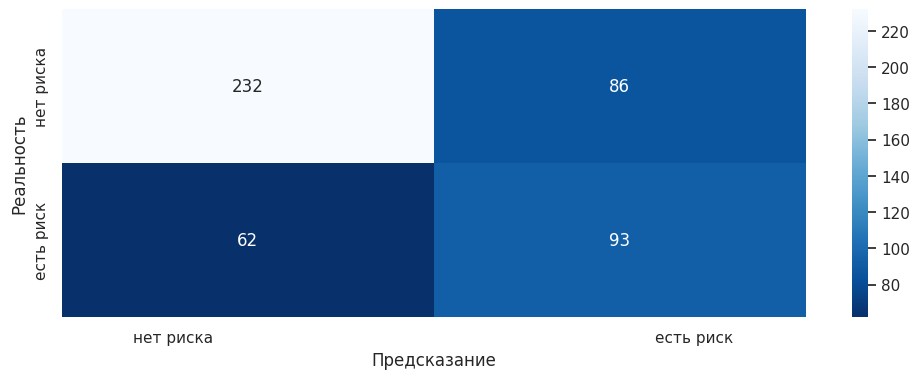

Оценка точности модели = 0.69
Оценка полноты классификации модели = 0.6
Оценка точности классификации модели = 0.52
Метрика ROC-AUC на тестовой выборке: 0.6647798742138366


In [49]:
RANDOM_STATE = 42

X = heart_train_1.drop(['id', 'Heart Attack Risk (Binary)'], axis=1)
y = heart_train_1['Heart Attack Risk (Binary)']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['Smoking', 'Diabetes', 'Family History', 'Obesity', 'Alcohol Consumption',
               'Previous Heart Problems', 'Medication Use', 'Gender_bool']

    # список количественных признаков тренировочной выборки

num_col_names = ['Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week', 'Diet',
               'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
               'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood sugar',
               'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure']

    ## подготовка признаков (масштабирование и кодирование)
    # создаем переменную с экземпляром класса OneHotEncoder()
    # включаем параметр для избегания появления дамми-ошибок,
    # отключаем sparse-отображение
encoder = OneHotEncoder(drop='first', sparse_output = False)
    # обучаем и трансформируем категориальные признаки из тренировочной выборки
    # сделаем это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

    # выполняем преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])


    # получаем от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names = encoder.get_feature_names_out()

    # создаем переменную с экземпляром класса StandartScaler() или MinMaxScaler()
    #задаем метод масштабирования
#scaler = MinMaxScaler()   #стандартизация
scaler = StandardScaler()  #нормализация

    # обучаем и трансформируем количественные признаки из тренировочной выборки
    # выполняем это одной командой
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

    # выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

    # создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов указаны из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


# обучим модель
model =  DecisionTreeClassifier(random_state=RANDOM_STATE)
model = model.fit(X_train, y_train)

# получим прогнозные метки классов
y_pred = model.predict(X_test)

y_test_pred_prob = model.predict_proba(X_test)


# Выводим матрицу ошибок.
sns.set(rc={'figure.figsize':(12,4)})
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальность')
plt.xlabel('Предсказание');
plt.xticks([0.3, 1.7], ['нет риска', 'есть риск'])
plt.yticks([0.5, 1.5], ['нет риска', 'есть риск'])
plt.show()


# Рассчитываем показатели Accuracy, Precision и Recall.
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print(f'Оценка точности модели = {round(accuracy, 2)}')
print(f'Оценка полноты классификации модели = {round(recall, 2)}')
print(f'Оценка точности классификации модели = {round(precision, 2)}')
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_prob[:,1])}')

<font color='blue'><b> Вывод: </b></font><br>


Для RANDOM_STATE = 42 показания тестовой выборки (473 строки) следующие:

- высокий риск - 155 пациентов
- низкий риск - 318 пациентов


В процессе обучения важны не только параметры точности, но правильность предсказания.

В данном случае удалось добиться оптимума: 93 положительных, 86 - ложноположительных,232 - отрицательных, 62 - ложноотрицательных.


В нашем случае лучшая модель -  **DecisionTreeClassifier(random_state=RANDOM_STATE)**



# **Предсказание тестовой выборки на основе построенной модели**

In [50]:
#Делаем копию датасета
heart_test_1 = heart_test.copy(deep=True)

In [51]:
# Пропуски заменил нулями, иначе модель не будет работать
heart_test_1.fillna(0, inplace=True)

<font color='green'><b>Для удобства в построении моделей создадим в  heart_test_1   столбец 'Gender_bool':    </b></font><br>

- "Female": 0
- "Male" : 1

In [52]:
heart_test_1['Gender_bool'] = heart_test_1['Gender'].\
replace({'Female' : 0, 'Male' : 1}).astype(float)

In [53]:
#Удалим столбцы с ненужной для обучения информацией
heart_test_1 = heart_test_1.drop(columns=['Unnamed: 0', 'id', 'Gender'])

**Масштабируем и обучаем:**

In [54]:
# подготовим данные для прогноза - проведем трансформацию категориальнх (OHE)
# и номинальных параметров (стандартизируем)
# обучим и трансформируйте количественные признаки
X_test_scaled = scaler.transform(heart_test_1[num_col_names])

# обучим и трансформируем категориальные признаки
X_test_ohe = encoder.transform(heart_test_1[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной
encoder_col_names = encoder.get_feature_names_out()
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# предсказания на основе 3 модели:
predictions = model.predict(X_test)

# рассчитываем вероятности и  показываем класс выборки
y_proba = model.predict_proba(X_test)[:,1]

In [55]:
#добавляем в тестовый датафрейм столбец с предсказаниями
heart_test_1['Heart_Attack_Risk_pred'] = y_proba

In [56]:
heart_test_1.head()

Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0  0.494382     0.264286    0.062328       0.0             1.0      1.0   
1  0.224719     0.953571    0.082493       1.0             0.0      0.0   
2  0.629213     0.092857    0.064161       0.0             1.0      1.0   
3  0.460674     0.567857    0.055912       1.0             1.0      1.0   
4  0.719101     0.485714    0.022915       1.0             0.0      1.0   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0      1.0                  1.0                 0.361618     2  ...   
1      1.0                  0.0                 0.996483     2  ...   
2      1.0                  0.0                 0.995561     0  ...   
3      1.0                  1.0                 0.437277     0  ...   
4      0.0                  1.0                 0.514920     0  ...   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0       0.306494                              1.0             0.333333   
1       0.087013                              0.0             0.166667   
2       0.205195                              7.0             1.000000   
3       0.163636                              0.0             0.666667   
4       0.580519                              5.0             0.000000   

   Blood sugar     CK-MB  Troponin  Systolic blood pressure  \
0     0.227018  0.048229  0.036512                 0.283871   
1     0.227018  0.048229  0.036512                 0.703226   
2     0.102767  0.002666  0.088455                 0.458065   
3     0.203557  0.056390  0.271774                 0.741935   
4     0.227018  0.048229  0.036512                 0.412903   

   Diastolic blood pressure  Gender_bool  Heart_Attack_Risk_pred  
0                  0.372093          1.0                     1.0  
1                  0.441860          0.0                     0.0  
2                  0.779070          1.0                     1.0  
3                  0.255814          0.0                     0.0  
4                  0.395349          1.0                     1.0  

[5 rows x 26 columns]

# Общий вывод и рекомендации

В данной работе был произведен анализ данных и построение модели предсказания риска сердечно-сосудистых заболеваний.

Тренировочные и тестовые данные  - в плохом состоянии. Для построения более - менее нормальной модели пришлось удалить большую часть тренировочной выборки. Тестовые данные оказались немного в лучшем состоянии, однако в данных присутствуют пропуски.

В результате точность построенной модели получилась невысокая.
  - Оценка точности модели = 0.69
  - Оценка полноты классификации модели = 0.6
  - Оценка точности классификации модели = 0.52
   -Метрика ROC-AUC на тестовой выборке: 0.6647798742138366

**В связи с вышесказанным рекомендую данную модель для предварительного тестирования пациентов (первичный прием у врача)**



**Вывод результатов**

In [57]:
test_result_pred = heart_test_1[['Heart_Attack_Risk_pred']]

In [58]:
test_result_id = heart_test[['id']]

In [59]:
test_result = pd.merge(test_result_id, test_result_pred, left_index=True, right_index=True, how='left')

In [60]:
test_result.head()

id  Heart_Attack_Risk_pred
0  7746                     1.0
1  4202                     0.0
2  6632                     1.0
3  4639                     0.0
4  4825                     1.0

In [61]:
test_result.to_csv(r"C:\Users\melni\Desktop\MASTERSKAYA\test_result.csv")